# Imports


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from tabulate import tabulate

# Funciones Auxiliares


In [64]:
def time_to_seconds(t):
    """
    Converts a time string in the format hh:mm:ss, mm:ss, mm:ss.xx, or ss.xx to total seconds.

    Args:
        t (str): Time as a string in one of the following formats:
            - 'hh:mm:ss'
            - 'mm:ss'
            - 'mm:ss.xx'
            - 'ss.xx'

    Returns:
        float: Total time in seconds, or None if input is NaN.
    """
    if pd.isna(t):
        return None
    parts = t.split(':')
    if len(parts) == 3:
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = float(parts[2])
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:
        minutes = int(parts[0])
        seconds = float(parts[1])
        return minutes * 60 + seconds
    else:
        return float(t)

# Experimentos

Estos experimentos nos ayudarán a elegir los mejores parámetros del programa HPMoon de cara a poder realizar los estudios posteriores.

## ¿Cuál es el número óptimo de subpoblaciones?

Entre los parámetros del programa HPMoon, uno de los más importantes es el número de subpoblaciones


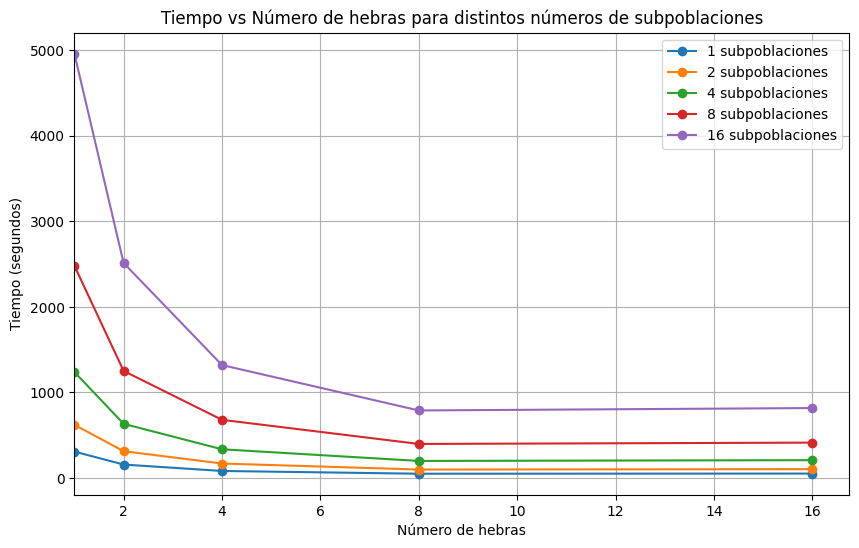

In [65]:
subpops_list = [1, 2, 4, 8, 16]
plt.figure(figsize=(10, 6))

for n_subpops in subpops_list:
    file_path = f'../results/experiments/ubuntu_native_{n_subpops}subpops.csv'
    try:
        df = pd.read_csv(file_path)
        df['time_seconds'] = df['time'].apply(time_to_seconds)
        plt.plot(df['threads'], df['time_seconds'], marker='o', label=f'{n_subpops} subpoblaciones')
    except FileNotFoundError:
        print(f'Archivo no encontrado: {file_path}')

plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras para distintos números de subpoblaciones')
plt.legend()
plt.grid(True)
plt.xlim(left=1)  # There is 1 thread at least
plt.show()

In [66]:
subpops_list = [1, 2, 4, 8, 16]
resultados = []

for n_subpops in subpops_list:
    file_path = f'../results/experiments/ubuntu_native_{n_subpops}subpops.csv'
    try:
        df = pd.read_csv(file_path)
        df['time_seconds'] = df['time'].apply(time_to_seconds)
        for _, row in df.iterrows():
            resultados.append({
                'Subpoblaciones': n_subpops,
                'Hebras': row['threads'],
                'Tiempo (segundos)': row['time_seconds']
            })
    except FileNotFoundError:
        print(f'Archivo no encontrado: {file_path}')

tabla = pd.DataFrame(resultados)
tabla = tabla.sort_values(['Subpoblaciones', 'Hebras']).reset_index(drop=True)
display(Markdown(tabla.to_markdown(index=False, floatfmt=".2f")))

|   Subpoblaciones |   Hebras |   Tiempo (segundos) |
|-----------------:|---------:|--------------------:|
|             1.00 |     1.00 |              309.43 |
|             1.00 |     2.00 |              157.79 |
|             1.00 |     4.00 |               82.73 |
|             1.00 |     8.00 |               50.58 |
|             1.00 |    16.00 |               52.32 |
|             2.00 |     1.00 |              622.63 |
|             2.00 |     2.00 |              313.86 |
|             2.00 |     4.00 |              169.76 |
|             2.00 |     8.00 |               99.37 |
|             2.00 |    16.00 |              104.06 |
|             4.00 |     1.00 |             1239.73 |
|             4.00 |     2.00 |              633.66 |
|             4.00 |     4.00 |              336.25 |
|             4.00 |     8.00 |              200.01 |
|             4.00 |    16.00 |              209.17 |
|             8.00 |     1.00 |             2481.89 |
|             8.00 |     2.00 |             1252.12 |
|             8.00 |     4.00 |              680.46 |
|             8.00 |     8.00 |              398.66 |
|             8.00 |    16.00 |              414.11 |
|            16.00 |     1.00 |             4960.00 |
|            16.00 |     2.00 |             2513.72 |
|            16.00 |     4.00 |             1320.66 |
|            16.00 |     8.00 |              790.04 |
|            16.00 |    16.00 |              818.17 |

In [67]:
subpops_list = [1, 2, 4, 8, 16]
resultados = []

for n_subpops in subpops_list:
    file_path = f'../results/experiments/ubuntu_native_{n_subpops}subpops.csv'
    try:
        df = pd.read_csv(file_path)
        df['time_seconds'] = df['time'].apply(time_to_seconds)
        # Get the base time with 1 thread
        base_time = df[df['threads'] == 1]['time_seconds'].values
        if len(base_time) == 0:
            print(f"No hay datos con 1 hebra para {n_subpops} subpoblaciones")
            continue
        base_time = base_time[0]
        for _, row in df.iterrows():
            var_pct = 100 * (row['time_seconds'] - base_time) / base_time
            resultados.append({
                'Subpoblaciones': n_subpops,
                'Hebras': row['threads'],
                'Tiempo (s)': row['time_seconds'],
                'Δ%': round(var_pct, 2)
            })
    except FileNotFoundError:
        print(f'Archivo no encontrado: {file_path}')

tabla = pd.DataFrame(resultados)
tabla = tabla.sort_values(['Subpoblaciones', 'Hebras']).reset_index(drop=True)
display(Markdown(tabla.to_markdown(index=False, floatfmt=".2f")))

# One table per subpopulation
for n_subpops in subpops_list:
    sub_tabla = tabla[tabla['Subpoblaciones'] == n_subpops][['Hebras', 'Tiempo (s)', 'Δ%']]
    display(Markdown(sub_tabla.to_markdown(index=False, floatfmt=".2f")))

|   Subpoblaciones |   Hebras |   Tiempo (s) |     Δ% |
|-----------------:|---------:|-------------:|-------:|
|             1.00 |     1.00 |       309.43 |   0.00 |
|             1.00 |     2.00 |       157.79 | -49.01 |
|             1.00 |     4.00 |        82.73 | -73.26 |
|             1.00 |     8.00 |        50.58 | -83.65 |
|             1.00 |    16.00 |        52.32 | -83.09 |
|             2.00 |     1.00 |       622.63 |   0.00 |
|             2.00 |     2.00 |       313.86 | -49.59 |
|             2.00 |     4.00 |       169.76 | -72.74 |
|             2.00 |     8.00 |        99.37 | -84.04 |
|             2.00 |    16.00 |       104.06 | -83.29 |
|             4.00 |     1.00 |      1239.73 |   0.00 |
|             4.00 |     2.00 |       633.66 | -48.89 |
|             4.00 |     4.00 |       336.25 | -72.88 |
|             4.00 |     8.00 |       200.01 | -83.87 |
|             4.00 |    16.00 |       209.17 | -83.13 |
|             8.00 |     1.00 |      2481.89 |   0.00 |
|             8.00 |     2.00 |      1252.12 | -49.55 |
|             8.00 |     4.00 |       680.46 | -72.58 |
|             8.00 |     8.00 |       398.66 | -83.94 |
|             8.00 |    16.00 |       414.11 | -83.31 |
|            16.00 |     1.00 |      4960.00 |   0.00 |
|            16.00 |     2.00 |      2513.72 | -49.32 |
|            16.00 |     4.00 |      1320.66 | -73.37 |
|            16.00 |     8.00 |       790.04 | -84.07 |
|            16.00 |    16.00 |       818.17 | -83.50 |

|   Hebras |   Tiempo (s) |     Δ% |
|---------:|-------------:|-------:|
|     1.00 |       309.43 |   0.00 |
|     2.00 |       157.79 | -49.01 |
|     4.00 |        82.73 | -73.26 |
|     8.00 |        50.58 | -83.65 |
|    16.00 |        52.32 | -83.09 |

|   Hebras |   Tiempo (s) |     Δ% |
|---------:|-------------:|-------:|
|     1.00 |       622.63 |   0.00 |
|     2.00 |       313.86 | -49.59 |
|     4.00 |       169.76 | -72.74 |
|     8.00 |        99.37 | -84.04 |
|    16.00 |       104.06 | -83.29 |

|   Hebras |   Tiempo (s) |     Δ% |
|---------:|-------------:|-------:|
|     1.00 |      1239.73 |   0.00 |
|     2.00 |       633.66 | -48.89 |
|     4.00 |       336.25 | -72.88 |
|     8.00 |       200.01 | -83.87 |
|    16.00 |       209.17 | -83.13 |

|   Hebras |   Tiempo (s) |     Δ% |
|---------:|-------------:|-------:|
|     1.00 |      2481.89 |   0.00 |
|     2.00 |      1252.12 | -49.55 |
|     4.00 |       680.46 | -72.58 |
|     8.00 |       398.66 | -83.94 |
|    16.00 |       414.11 | -83.31 |

|   Hebras |   Tiempo (s) |     Δ% |
|---------:|-------------:|-------:|
|     1.00 |      4960.00 |   0.00 |
|     2.00 |      2513.72 | -49.32 |
|     4.00 |      1320.66 | -73.37 |
|     8.00 |       790.04 | -84.07 |
|    16.00 |       818.17 | -83.50 |

In [68]:
tabla_pivot = tabla.pivot(index='Hebras', columns='Subpoblaciones', values='Δ%')
display(Markdown(tabla_pivot.to_markdown()))

|   Hebras |      1 |      2 |      4 |      8 |     16 |
|---------:|-------:|-------:|-------:|-------:|-------:|
|        1 |   0    |   0    |   0    |   0    |   0    |
|        2 | -49.01 | -49.59 | -48.89 | -49.55 | -49.32 |
|        4 | -73.26 | -72.74 | -72.88 | -72.58 | -73.37 |
|        8 | -83.65 | -84.04 | -83.87 | -83.94 | -84.07 |
|       16 | -83.09 | -83.29 | -83.13 | -83.31 | -83.5  |

**Óptimo con 8 hebras:** Cuando se utilizan 8 subpoblaciones y 8 hebras, cada hebra puede encargarse de una subpoblación, lo que permite aprovechar todos los núcleos físicos del sistema sin generar sobrecarga adicional.

**Caída de rendimiento al aumentar las hebras:** Si se incrementa el número de hebras a 16 manteniendo 8 subpoblaciones, solo 8 hebras estarán activamente trabajando, mientras que las restantes permanecerán ociosas. Esto puede provocar overhead y contención de recursos, reduciendo la eficiencia.

**Recomendación:** Es recomendable igualar el número de hebras al de subpoblaciones y, si es posible, al número de núcleos físicos del sistema.

En el dispositivo utilizado (Lenovo Legion 5 15ARH05H), no se observan mejoras significativas en el rendimiento al aumentar el número de hebras más allá de 8.


## ¿Cuál es el número óptimo de hebras?


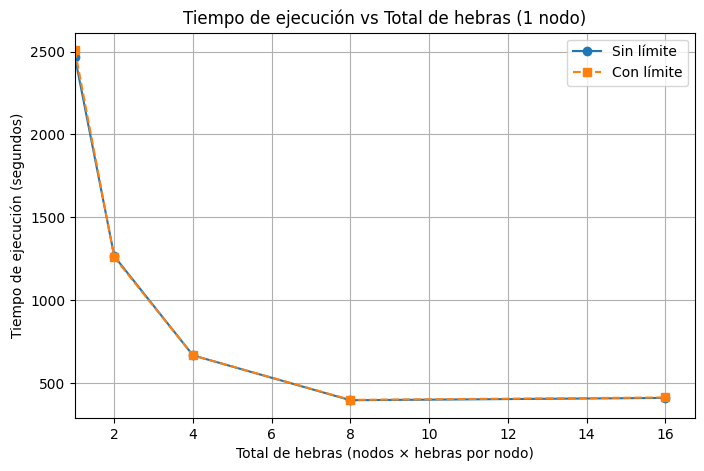

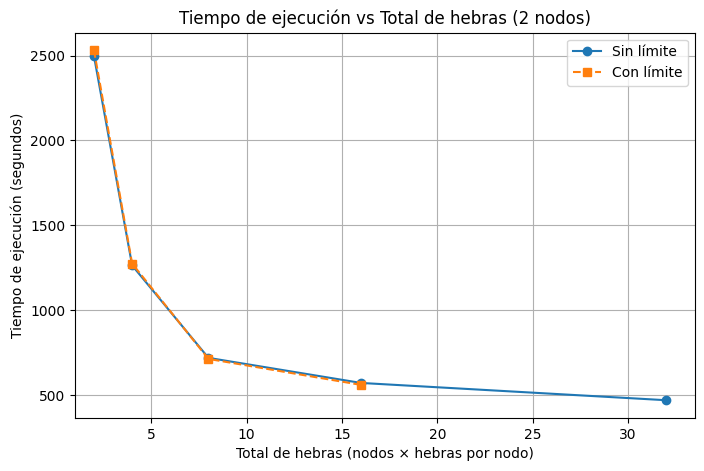

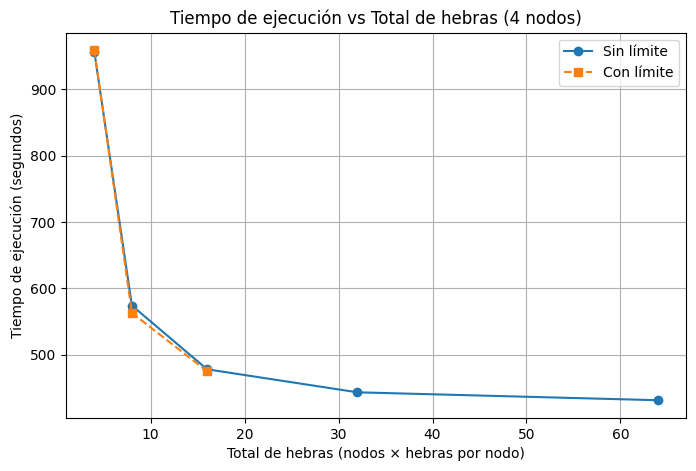

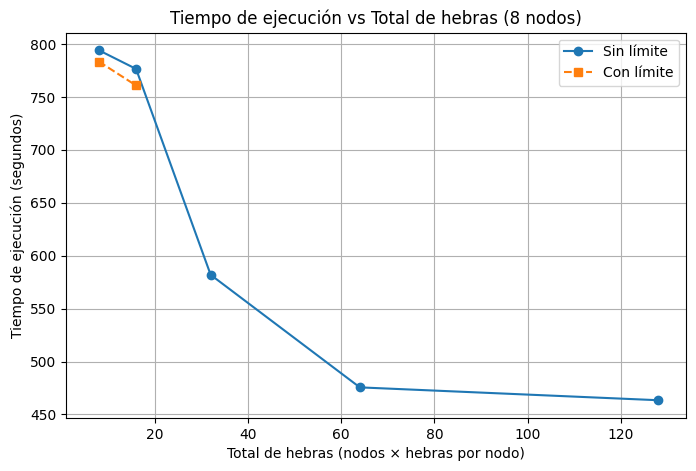

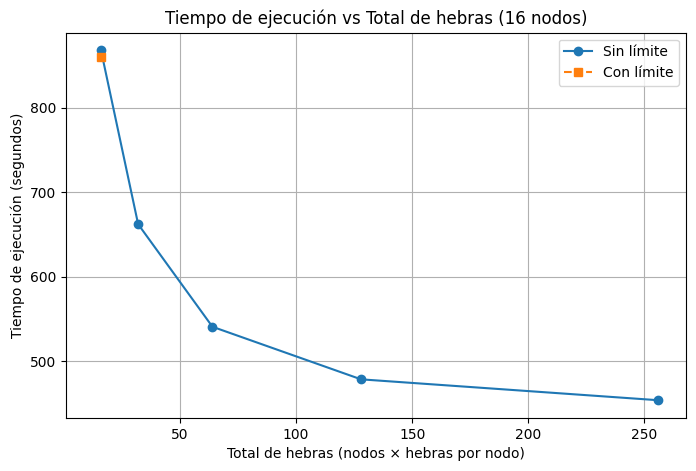

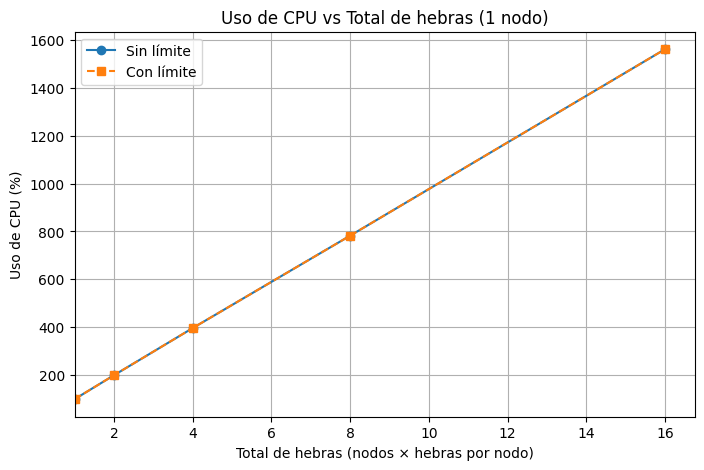

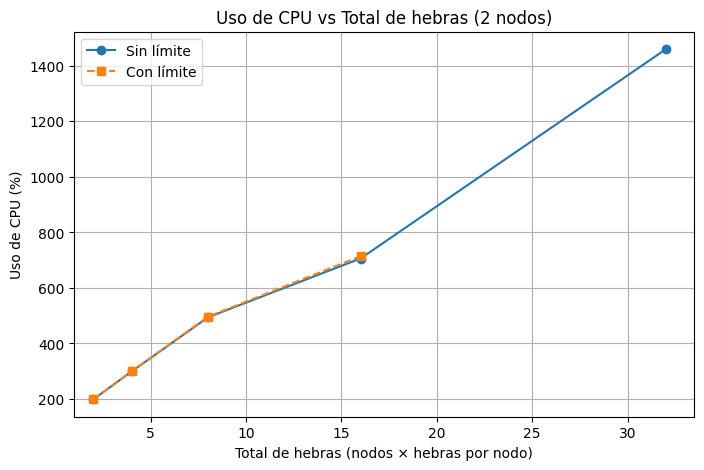

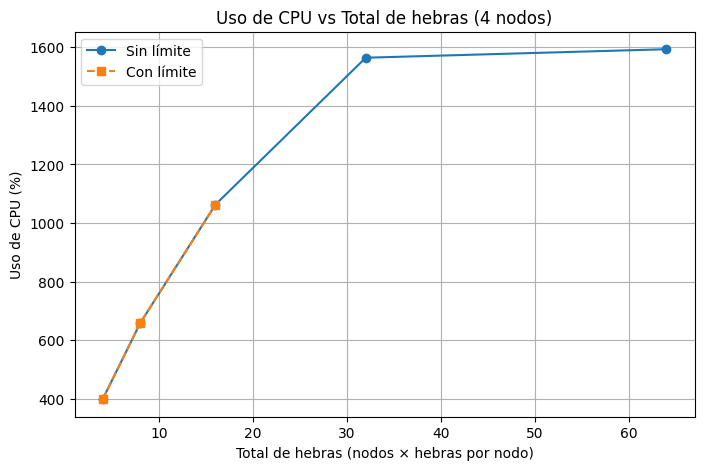

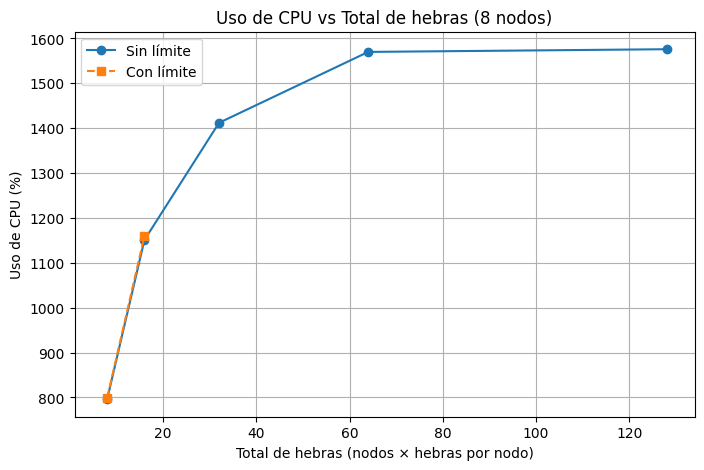

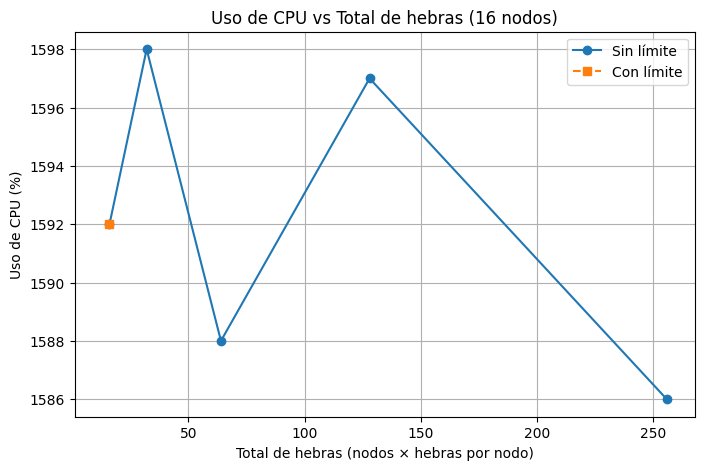

In [69]:
# Load CSVs
df_no_limit = pd.read_csv('../results/experiments/ubuntu_native_no-limit.csv')
df_limit = pd.read_csv('../results/experiments/ubuntu_native_limit.csv')

# Convert time column to seconds using the provided helper function
df_no_limit['time_seconds'] = df_no_limit['time'].apply(time_to_seconds)
df_limit['time_seconds'] = df_limit['time'].apply(time_to_seconds)

# Compute total threads (nodes × threads per node)
df_no_limit['total_threads'] = df_no_limit['nodes'] * df_no_limit['threads']
df_limit['total_threads'] = df_limit['nodes'] * df_limit['threads']

# Plot: Execution time vs total threads, grouped by number of nodes
for n_nodes in sorted(df_no_limit['nodes'].unique()):
    plt.figure(figsize=(8, 5))
    # Filter for current number of nodes
    df_no = df_no_limit[df_no_limit['nodes'] == n_nodes]
    df_lim = df_limit[df_limit['nodes'] == n_nodes]
    plt.plot(df_no['total_threads'], df_no['time_seconds'], 'o-', label='Sin límite')
    plt.plot(df_lim['total_threads'], df_lim['time_seconds'], 's--', label='Con límite')
    plt.xlabel('Total de hebras (nodos × hebras por nodo)')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title(f'Tiempo de ejecución vs Total de hebras ({n_nodes} nodo{"s" if n_nodes > 1 else ""})')
    plt.legend()
    plt.grid(True)
    plt.xlim(left=1)
    plt.show()

# Plot: CPU usage vs total threads, grouped by number of nodes
for n_nodes in sorted(df_no_limit['nodes'].unique()):
    plt.figure(figsize=(8, 5))
    df_no = df_no_limit[df_no_limit['nodes'] == n_nodes]
    df_lim = df_limit[df_limit['nodes'] == n_nodes]
    plt.plot(df_no['total_threads'], df_no['cpu_percentage'], 'o-', label='Sin límite')
    plt.plot(df_lim['total_threads'], df_lim['cpu_percentage'], 's--', label='Con límite')
    plt.xlabel('Total de hebras (nodos × hebras por nodo)')
    plt.ylabel('Uso de CPU (%)')
    plt.title(f'Uso de CPU vs Total de hebras ({n_nodes} nodo{"s" if n_nodes > 1 else ""})')
    plt.legend()
    plt.grid(True)
    plt.xlim(left=1)
    plt.show()

In [70]:
# Sort by execution time (ascending)
sorted_df = df_no_limit.sort_values('time_seconds')

# Create a list to store the best results
best_results = []

for rank, (_, row) in enumerate(sorted_df.iterrows(), 1):
    total_threads = row['nodes'] * row['threads']
    best_results.append({
        "Nodos": row['nodes'],
        "Hebras por nodo": row['threads'],
        "Hebras totales": total_threads,
        "Tiempo (s)": f"{row['time_seconds']:.2f}",
        "Uso de CPU (%)": row['cpu_percentage']
    })

# Convert to DataFrame and show as markdown table
tabla = pd.DataFrame(best_results)
display(Markdown(tabla.to_markdown(index=False)))

|   Nodos |   Hebras por nodo |   Hebras totales |   Tiempo (s) |   Uso de CPU (%) |
|--------:|------------------:|-----------------:|-------------:|-----------------:|
|       1 |                 8 |                8 |       395.63 |              782 |
|       1 |                16 |               16 |       409.51 |             1561 |
|       4 |                16 |               64 |       431.3  |             1593 |
|       4 |                 8 |               32 |       443.23 |             1564 |
|      16 |                16 |              256 |       453.48 |             1586 |
|       8 |                16 |              128 |       463.45 |             1576 |
|       2 |                16 |               32 |       469.88 |             1460 |
|       8 |                 8 |               64 |       475.59 |             1570 |
|       4 |                 4 |               16 |       477.9  |             1063 |
|      16 |                 8 |              128 |       478.23 |             1597 |
|      16 |                 4 |               64 |       540.54 |             1588 |
|       2 |                 8 |               16 |       571.65 |              706 |
|       4 |                 2 |                8 |       573.94 |              659 |
|       8 |                 4 |               32 |       581.91 |             1412 |
|      16 |                 2 |               32 |       662.1  |             1598 |
|       1 |                 4 |                4 |       666.51 |              396 |
|       2 |                 4 |                8 |       719.43 |              494 |
|       8 |                 2 |               16 |       776.44 |             1151 |
|       8 |                 1 |                8 |       794.09 |              796 |
|      16 |                 1 |               16 |       868.28 |             1592 |
|       4 |                 1 |                4 |       956.38 |              399 |
|       2 |                 2 |                4 |      1263.74 |              299 |
|       1 |                 2 |                2 |      1264.94 |              199 |
|       1 |                 1 |                1 |      2467.76 |               99 |
|       2 |                 1 |                2 |      2497.06 |              199 |

A partir del análisis de la tabla, se pueden extraer las siguientes conclusiones técnicas:

- El mejor rendimiento se alcanza al emplear un menor número de nodos y un mayor número de hebras por nodo, siendo la configuración óptima la de 1 nodo y 8 hebras.
- Aunque el límite físico de hebras de la CPU es de 16, se observa que, entre los 10 mejores resultados, solo 3 respetan este límite. En los demás casos, incrementar el número de hebras más allá de la capacidad física de la CPU sigue proporcionando mejoras en el rendimiento. Este comportamiento, aunque inicialmente contraintuitivo, puede explicarse analizando el uso efectivo de la CPU.
- El porcentaje de uso de CPU refleja el grado de aprovechamiento de las hebras disponibles. Por ejemplo, con 1 hebra el uso máximo es 100%, con 2 hebras es 200%, y así sucesivamente, hasta un máximo teórico de 1600% (16 hebras × 100%). En configuraciones con un único nodo, el incremento en el número de hebras se traduce en un aumento proporcional del uso de CPU:

| Nodos | Hebras por nodo | Hebras totales | Tiempo (s) | Uso CPU (%) |
| ----- | --------------- | -------------- | ---------- | ----------- |
| 1     | 8               | 8              | 395.63     | 782         |
| 1     | 16              | 16             | 409.51     | 1561        |
| 1     | 4               | 4              | 666.51     | 396         |
| 1     | 2               | 2              | 1264.94    | 199         |
| 1     | 1               | 1              | 2467.76    | 99          |

- En contraste, cuando el número total de hebras se distribuye entre varios nodos (incluso si no se supera el límite físico de la CPU), el rendimiento no mejora de la misma manera. Esto se debe a la sobrecarga asociada a la gestión de múltiples nodos, que puede contrarrestar los beneficios de disponer de más hebras. En estos casos, el uso de CPU no alcanza los valores esperados, resultando en un rendimiento inferior respecto a configuraciones mononodo equivalentes:

| Nodos | Hebras por nodo | Hebras totales | Tiempo (s) | Uso CPU (%) |
| ----- | --------------- | -------------- | ---------- | ----------- |
| 4     | 4               | 16             | 477.90     | 1063        |
| 2     | 8               | 16             | 571.65     | 706         |
| 4     | 2               | 8              | 573.94     | 659         |
| 2     | 4               | 8              | 719.43     | 494         |
| 8     | 2               | 16             | 776.44     | 1151        |
| 8     | 1               | 8              | 794.09     | 796         |
| 16    | 1               | 16             | 868.28     | 1592        |
| 4     | 1               | 4              | 956.38     | 399         |
| 2     | 2               | 4              | 1263.74    | 299         |
| 2     | 1               | 2              | 2497.06    | 199         |

- Por tanto, para configuraciones multinodo, es necesario incrementar el número de hebras más allá de la capacidad física de la CPU para acercarse al uso máximo teórico (1600%), lo que explica por qué se obtienen mejores resultados bajo estas condiciones.


Si se analiza el rendimiento manteniendo constante el número total de hebras, se observa que las configuraciones con un único nodo presentan sistemáticamente los mejores tiempos de ejecución. Esto indica que, para un mismo grado de paralelismo, la distribución de hebras en un solo nodo minimiza la sobrecarga de comunicación y sincronización asociada al entorno multinodo.

### 16 hebras

| Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| ----- | ---------------- | ------------- | -------- | ------------- |
| 1     | 16               | 16            | 409.51   | 1561          |
| 4     | 4                | 16            | 477.90   | 1063          |
| 2     | 8                | 16            | 571.65   | 706           |
| 8     | 2                | 16            | 776.44   | 1151          |
| 16    | 1                | 16            | 868.28   | 1592          |

### 8 hebras

| Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| ----- | ---------------- | ------------- | -------- | ------------- |
| 1     | 8                | 8             | 395.63   | 782           |
| 4     | 2                | 8             | 573.94   | 659           |
| 2     | 4                | 8             | 719.43   | 494           |
| 8     | 1                | 8             | 794.09   | 796           |

### 4 hebras

| Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| ----- | ---------------- | ------------- | -------- | ------------- |
| 1     | 4                | 4             | 666.51   | 396           |
| 4     | 1                | 4             | 956.38   | 399           |
| 2     | 2                | 4             | 1263.74  | 299           |

### 2 hebras

| Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| ----- | ---------------- | ------------- | -------- | ------------- |
| 1     | 2                | 2             | 1264.94  | 199           |
| 2     | 1                | 2             | 2497.06  | 199           |

### 1 hebra

| Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| ----- | ---------------- | ------------- | -------- | ------------- |
| 1     | 1                | 1             | 2467.76  | 99            |

En general, se aprecia que, para un mismo número de hebras, el rendimiento mejora al reducir el número de nodos, lo que confirma el impacto negativo de la sobrecarga multinodo. Una excepción a esta tendencia se observa en el caso de 2 y 4 nodos con 4 hebras, donde la configuración de 4 nodos supera en rendimiento a la de 2 nodos, invirtiendo el orden esperado.


## ¿Tiene sentido que todos los nodos tengan GPU?


In [ ]:
# Load the CSV data for GPU runs
df_ubuntu_native_gpu = pd.read_csv('../results/thread-sweep/ubuntu_native_gpu.csv')

# Filter for single-node executions (nodes == 1)
df_ubuntu_native_gpu_single_node = df_ubuntu_native_gpu[df_ubuntu_native_gpu['nodes'] == 1].copy()

# Convert the 'time' column to seconds using the provided function
df_ubuntu_native_gpu_single_node['time_seconds'] = df_ubuntu_native_gpu_single_node['time'].apply(time_to_seconds)

# Filter for runs with a single thread per node
df_ubuntu_native_gpu_single_thread = df_ubuntu_native_gpu[df_ubuntu_native_gpu['threads'] == 1].copy()

# Convert the 'time' column to seconds using the provided function
df_ubuntu_native_gpu_single_thread['time_seconds'] = df_ubuntu_native_gpu_single_thread['time'].apply(time_to_seconds)

# Plot execution time vs number of nodes for runs with 1 thread per node
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_gpu_single_thread['nodes'], df_ubuntu_native_gpu_single_thread['time_seconds'], marker='o')
plt.xlabel('Número de nodos')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución vs Número de nodos (1 hebra por nodo)')
plt.grid(True)
plt.show()

## Conclusiones

A partir de los experimentos realizados, se extraen las siguientes conclusiones técnicas relevantes para futuros estudios:

- **Número de subpoblaciones:** Se selecciona 8 subpoblaciones como valor óptimo, ya que maximiza el rendimiento observado. Utilizar menos subpoblaciones implica un aprovechamiento subóptimo de los recursos de cómputo, mientras que aumentar el número no aporta mejoras significativas, evidenciando que el sistema alcanza su máximo rendimiento con 8 subpoblaciones.

- **Número de hebras:** El incremento del número de hebras no garantiza una mejora continua del rendimiento, especialmente cuando se mantiene el número de hebras, pero estas se reparten en más nodos. El mejor resultado se obtiene con una configuración de 1 nodo y 8 hebras, coincidiendo con el número de núcleos físicos del sistema.

- **Diferencia porcentual de rendimiento:** La diferencia de tiempo de ejecución entre la configuración óptima (1 nodo, 8 hebras) y la de 1 nodo y 16 hebras es:

  $$
  \text{Diferencia (\%)} = \frac{409.51 - 395.63}{395.63} \times 100 = 3.51\%
  $$

  Por tanto, ejecutar con 1 nodo y 16 hebras resulta aproximadamente un **3.5% más lento** que con 1 nodo y 8 hebras.

- **Criterio para los estudios comparativos:** Dado que el objetivo principal es comparar la conservación del rendimiento entre la ejecución nativa y la ejecución en contenedores, y no la búsqueda del óptimo absoluto, se realizarán los experimentos mononodo hasta 16 hebras.

- **Escalabilidad multinodo:** Para el análisis multinodo, se mantendrá el criterio de comparar el rendimiento observado en la ejecución nativa, explorando configuraciones de hasta 16 nodos y 16 hebras, asegurando así una evaluación completa de la escalabilidad y la equivalencia de rendimiento entre ambos entornos.


# Escalabilidad Mononodo

En este análisis se evaluará la escalabilidad del modelo mononodo en su ejecución nativa y se comparará con los siguientes casos:

1. Ejecución en contenedor Docker
2. Ejecución en contenedor Podman
3. Ejecución en MacOS
4. Ejecución en Windows


## Ejecución Nativa


### Sólo CPU


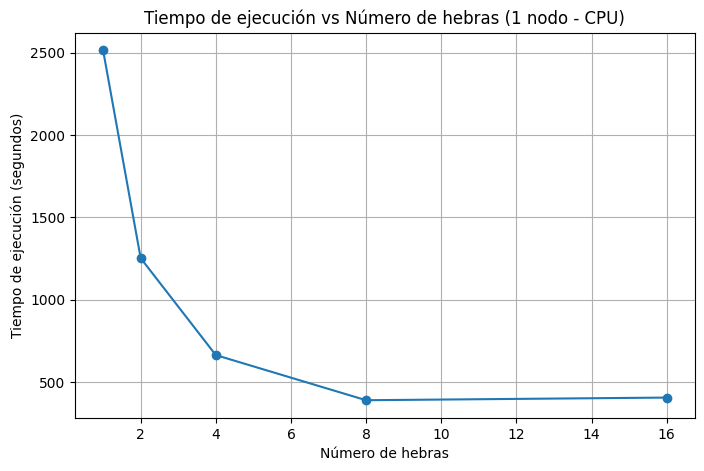

In [110]:
# Load the CSV data
df_ubuntu_native = pd.read_csv('../results/thread-sweep/ubuntu_native.csv')

# Filter for single-node executions (nodes == 1)
df_ubuntu_native_single_node = df_ubuntu_native[df_ubuntu_native['nodes'] == 1].copy()

# Convert the 'time' column to seconds
df_ubuntu_native_single_node['time_seconds'] = df_ubuntu_native_single_node['time'].apply(time_to_seconds)

# Plot execution time vs number of threads for single-node runs
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_single_node['threads'], df_ubuntu_native_single_node['time_seconds'], marker='o')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución vs Número de hebras (1 nodo - CPU)')
plt.grid(True)
plt.show()

In [84]:
# Get the base time (1 thread)
base_time = df_ubuntu_native_single_node[df_ubuntu_native_single_node['threads'] == 1]['time_seconds'].values[0]

# Calculate percentage variation
df_ubuntu_native_single_node['Δ%'] = 100 * (df_ubuntu_native_single_node['time_seconds'] - base_time) / base_time

# Create and show the table
table = df_ubuntu_native_single_node[['threads', 'time_seconds', 'Δ%']].rename(
    columns={'threads': 'Hebras', 'time_seconds': 'Tiempo (s)', 'Δ%': 'Δ% vs 1 hebra'}
)
display(Markdown(table.to_markdown(index=False, floatfmt=".2f")))

|   Hebras |   Tiempo (s) |   Δ% vs 1 hebra |
|---------:|-------------:|----------------:|
|     1.00 |      2515.21 |            0.00 |
|     2.00 |      1253.18 |          -50.18 |
|     4.00 |       664.69 |          -73.57 |
|     8.00 |       390.72 |          -84.47 |
|    16.00 |       406.76 |          -83.83 |

Análisis:

- El tiempo de ejecución disminuye drásticamente al aumentar el número de hebras, especialmente de 1 a 8 hebras.
- Con 2 hebras, el tiempo se reduce a la mitad (-50%), y con 4 hebras, a casi un cuarto (-73.6%).
- El mayor beneficio se observa al pasar de 4 a 8 hebras, alcanzando una reducción del -84.5% respecto a una hebra.
- Al aumentar a 16 hebras, el tiempo es ligeramente superior al de 8 hebras, lo que sugiere saturación o sobrecarga.
- El óptimo se alcanza con 8 hebras, coincidiendo con el número de núcleos físicos del sistema.


Text(0.5, 1.0, 'Porcentaje de CPU vs Número de hebras (1 nodo - CPU)')

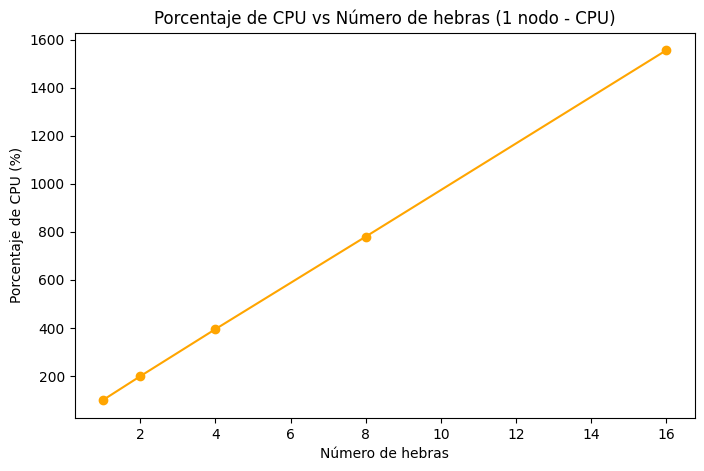

In [111]:
# Plot CPU usage vs number of threads for single-node runs
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_single_node['threads'], df_ubuntu_native_single_node['cpu_percentage'], marker='o', color='orange')
plt.xlabel('Número de hebras')
plt.ylabel('Porcentaje de CPU (%)')
plt.title('Porcentaje de CPU vs Número de hebras (1 nodo - CPU)')

In [86]:
# Show CPU usage table by number of threads, including theoretical max CPU usage and efficiency
cpu_table = df_ubuntu_native_single_node[['threads', 'cpu_percentage']].rename(
    columns={'threads': 'Hebras', 'cpu_percentage': 'Porcentaje de CPU (%)'}
)
# Add theoretical max CPU usage column
cpu_table['Max uso CPU (%)'] = cpu_table['Hebras'] * 100
# Add efficiency column: CPU usage (%) / Max CPU usage (%) * 100
cpu_table['Eficiencia CPU (%)'] = 100 * cpu_table['Porcentaje de CPU (%)'] / cpu_table['Max uso CPU (%)']
display(Markdown(cpu_table.to_markdown(index=False, floatfmt=".2f")))

|   Hebras |   Porcentaje de CPU (%) |   Max uso CPU (%) |   Eficiencia CPU (%) |
|---------:|------------------------:|------------------:|---------------------:|
|     1.00 |                   99.00 |            100.00 |                99.00 |
|     2.00 |                  199.00 |            200.00 |                99.50 |
|     4.00 |                  395.00 |            400.00 |                98.75 |
|     8.00 |                  780.00 |            800.00 |                97.50 |
|    16.00 |                 1556.00 |           1600.00 |                97.25 |

Análisis:

- El uso de CPU crece casi linealmente con el número de hebras, lo que indica un buen escalado del paralelismo.
- La eficiencia de CPU se mantiene muy alta en todos los casos (por encima del 97%), lo que significa que casi todo el potencial de la CPU se está aprovechando.
- A medida que aumenta el número de hebras, la eficiencia baja ligeramente (de 99% a 97.25%), lo que es esperable debido a la sobrecarga de gestión de más hilos y posibles contenciones.
- El sistema escala de forma eficiente hasta 16 hebras, con una pérdida de eficiencia muy pequeña.


### CPU + GPU


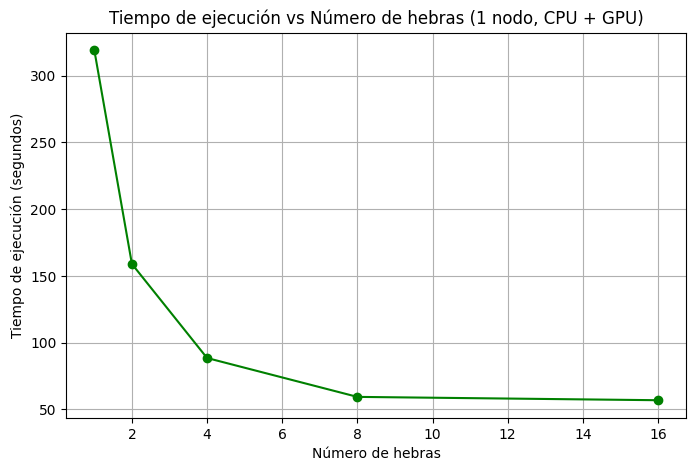

In [112]:
# Load the CSV data for GPU runs
df_ubuntu_native_gpu = pd.read_csv('../results/thread-sweep/ubuntu_native_gpu.csv')

# Filter for single-node executions (nodes == 1)
df_ubuntu_native_gpu_single_node = df_ubuntu_native_gpu[df_ubuntu_native_gpu['nodes'] == 1].copy()

# Convert the 'time' column to seconds using the provided function
df_ubuntu_native_gpu_single_node['time_seconds'] = df_ubuntu_native_gpu_single_node['time'].apply(time_to_seconds)

# Plot execution time vs number of threads for single-node GPU runs
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_gpu_single_node['threads'], df_ubuntu_native_gpu_single_node['time_seconds'], marker='o', color='green')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución vs Número de hebras (1 nodo, CPU + GPU)')
plt.grid(True)
plt.show()

In [88]:
# Get the base time (1 thread)
base_time_gpu = df_ubuntu_native_gpu_single_node[df_ubuntu_native_gpu_single_node['threads'] == 1]['time_seconds'].values[0]

# Calculate percentage variation
df_ubuntu_native_gpu_single_node['Δ%'] = 100 * (df_ubuntu_native_gpu_single_node['time_seconds'] - base_time_gpu) / base_time_gpu

# Create and display the table
table_gpu = df_ubuntu_native_gpu_single_node[['threads', 'time_seconds', 'Δ%']].rename(
    columns={'threads': 'Hebras', 'time_seconds': 'Tiempo (s)', 'Δ%': 'Δ% vs 1 hebra'}
)
display(Markdown(table_gpu.to_markdown(index=False, floatfmt=".2f")))


|   Hebras |   Tiempo (s) |   Δ% vs 1 hebra |
|---------:|-------------:|----------------:|
|     1.00 |       319.01 |            0.00 |
|     2.00 |       158.94 |          -50.18 |
|     4.00 |        88.52 |          -72.25 |
|     8.00 |        59.41 |          -81.38 |
|    16.00 |        56.91 |          -82.16 |

### Comparativa de Rendimiento


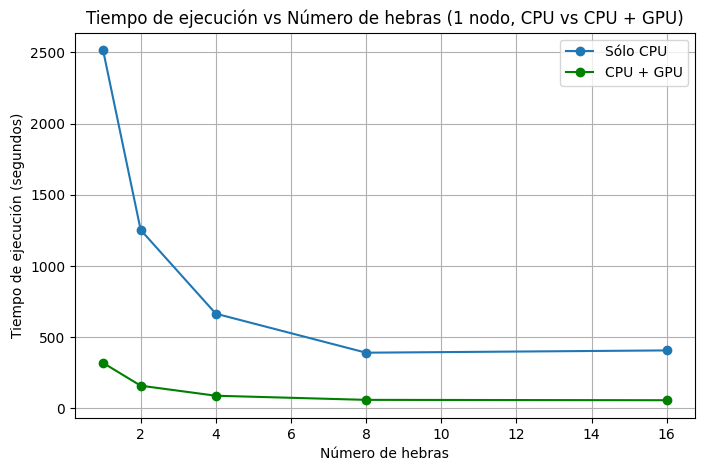

In [113]:
# Comparative plot in a single figure: CPU vs CPU+GPU (1 node)
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_single_node['threads'], df_ubuntu_native_single_node['time_seconds'], marker='o', label='Sólo CPU')
plt.plot(df_ubuntu_native_gpu_single_node['threads'], df_ubuntu_native_gpu_single_node['time_seconds'], marker='o', color='green', label='CPU + GPU')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución vs Número de hebras (1 nodo, CPU vs CPU + GPU)')
plt.legend()
plt.grid(True)
plt.show()

In [94]:
# Comparative table in Markdown: Threads, CPU Time, CPU+GPU Time, Percentage Variation

# Merge by number of threads
comparison = pd.merge(
    df_ubuntu_native_single_node[['threads', 'time_seconds']],
    df_ubuntu_native_gpu_single_node[['threads', 'time_seconds']],
    on='threads',
    suffixes=('_CPU', '_GPU')
)

# Calculate percentage variation between CPU+GPU and CPU
comparison['Variation %'] = 100 * (comparison['time_seconds_GPU'] - comparison['time_seconds_CPU']) / comparison['time_seconds_CPU']

# Rename columns for the table
comparison_table = comparison.rename(columns={
    'threads': 'Hebras',
    'time_seconds_CPU': 'Tiempo CPU (s)',
    'time_seconds_GPU': 'Tiempo CPU+GPU (s)',
    'Variation %': 'Variación %'
})

# Display comparative table in Markdown
display(Markdown(comparison_table[['Hebras', 'Tiempo CPU (s)', 'Tiempo CPU+GPU (s)', 'Variación %']].to_markdown(index=False, floatfmt=".2f")))

|   Hebras |   Tiempo CPU (s) |   Tiempo CPU+GPU (s) |   Variación % |
|---------:|-----------------:|---------------------:|--------------:|
|     1.00 |          2515.21 |               319.01 |        -87.32 |
|     2.00 |          1253.18 |               158.94 |        -87.32 |
|     4.00 |           664.69 |                88.52 |        -86.68 |
|     8.00 |           390.72 |                59.41 |        -84.79 |
|    16.00 |           406.76 |                56.91 |        -86.01 |

## Ejecución en Contenedores en Nativo


### Sólo CPU


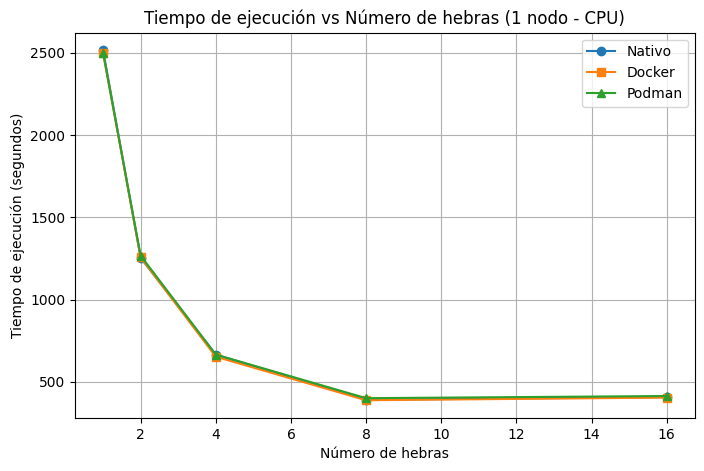

In [109]:
# Load the CSV data
df_ubuntu_docker = pd.read_csv('../results/thread-sweep/ubuntu_docker.csv')
df_ubuntu_podman = pd.read_csv('../results/thread-sweep/ubuntu_podman.csv')

# Filter for single-node executions (nodes == 1)
df_ubuntu_docker_single_node = df_ubuntu_docker[df_ubuntu_docker['nodes'] == 1].copy()
df_ubuntu_podman_single_node = df_ubuntu_podman[df_ubuntu_podman['nodes'] == 1].copy()

# Convert the 'time' column to seconds using the provided function
df_ubuntu_docker_single_node['time_seconds'] = df_ubuntu_docker_single_node['time'].apply(time_to_seconds)
df_ubuntu_podman_single_node['time_seconds'] = df_ubuntu_podman_single_node['time'].apply(time_to_seconds)

# Plot execution time vs number of threads for all environments
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_single_node['threads'], df_ubuntu_native_single_node['time_seconds'], marker='o', label='Nativo')
plt.plot(df_ubuntu_docker_single_node['threads'], df_ubuntu_docker_single_node['time_seconds'], marker='s', label='Docker')
plt.plot(df_ubuntu_podman_single_node['threads'], df_ubuntu_podman_single_node['time_seconds'], marker='^', label='Podman')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución vs Número de hebras (1 nodo - CPU)')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
# Calculate percentage variation
table = pd.DataFrame({
    'Hebras': df_ubuntu_native_single_node['threads'],
    'Nativo (s)': df_ubuntu_native_single_node['time_seconds'].values,
    'Docker (s)': df_ubuntu_docker_single_node['time_seconds'].values,
    'Docker Δ%': 100 * (df_ubuntu_docker_single_node['time_seconds'].values - df_ubuntu_native_single_node['time_seconds'].values) / df_ubuntu_native_single_node['time_seconds'].values,
    'Podman (s)': df_ubuntu_podman_single_node['time_seconds'].values,
    'Podman Δ%': 100 * (df_ubuntu_podman_single_node['time_seconds'].values - df_ubuntu_native_single_node['time_seconds'].values) / df_ubuntu_native_single_node['time_seconds'].values
})

# Show as markdown
display(Markdown(table.to_markdown(index=False, floatfmt=".2f")))

|   Hebras |   Nativo (s) |   Docker (s) |   Docker Δ% |   Podman (s) |   Podman Δ% |
|---------:|-------------:|-------------:|------------:|-------------:|------------:|
|     1.00 |      2515.21 |      2499.09 |       -0.64 |      2499.16 |       -0.64 |
|     2.00 |      1253.18 |      1255.95 |        0.22 |      1266.51 |        1.06 |
|     4.00 |       664.69 |       652.33 |       -1.86 |       665.38 |        0.10 |
|     8.00 |       390.72 |       388.04 |       -0.69 |       400.51 |        2.51 |
|    16.00 |       406.76 |       404.09 |       -0.66 |       413.53 |        1.66 |

Análisis:

- El rendimiento de Docker y Podman es prácticamente idéntico al nativo en todos los casos, con diferencias menores al 2.5%.
- Para 1, 4, 8 y 16 hebras, Docker es incluso ligeramente más rápido que la ejecución nativa (Δ% negativo).
- Podman muestra un comportamiento muy similar, aunque para 8 y 16 hebras es marginalmente más lento que nativo, pero la diferencia sigue siendo muy pequeña.
- Las diferencias de tiempo son tan pequeñas que pueden atribuirse a la variabilidad normal de ejecución y no a una penalización real por el uso de contenedores.


### CPU + GPU


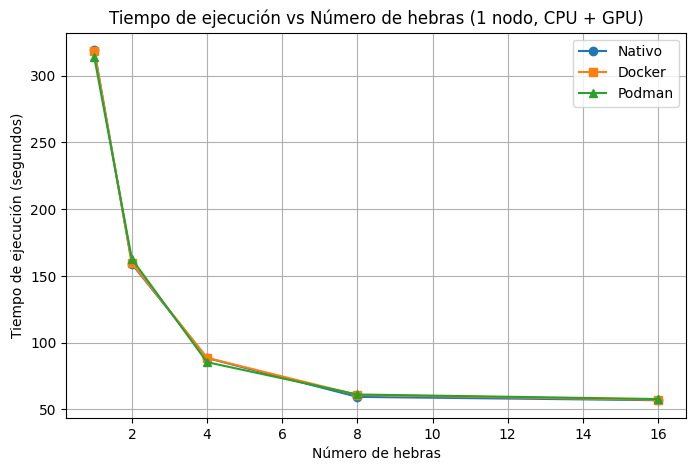

In [114]:
# Load the CSV data
df_ubuntu_docker_gpu = pd.read_csv('../results/thread-sweep/ubuntu_docker_gpu.csv')
df_ubuntu_podman_gpu = pd.read_csv('../results/thread-sweep/ubuntu_podman_gpu.csv')
# Filtrar ejecuciones mononodo (nodes == 1)
df_ubuntu_docker_gpu_single_node = df_ubuntu_docker_gpu[df_ubuntu_docker_gpu['nodes'] == 1].copy()
df_ubuntu_podman_gpu_single_node = df_ubuntu_podman_gpu[df_ubuntu_podman_gpu['nodes'] == 1].copy()

# Convertir la columna 'time' a segundos usando la función auxiliar
df_ubuntu_docker_gpu_single_node['time_seconds'] = df_ubuntu_docker_gpu_single_node['time'].apply(time_to_seconds)
df_ubuntu_podman_gpu_single_node['time_seconds'] = df_ubuntu_podman_gpu_single_node['time'].apply(time_to_seconds)

# Graficar tiempo de ejecución vs número de hebras para Docker y Podman (GPU, 1 nodo)
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_gpu_single_node['threads'], df_ubuntu_native_gpu_single_node['time_seconds'], marker='o', label='Nativo')
plt.plot(df_ubuntu_docker_gpu_single_node['threads'], df_ubuntu_docker_gpu_single_node['time_seconds'], marker='s', label='Docker')
plt.plot(df_ubuntu_podman_gpu_single_node['threads'], df_ubuntu_podman_gpu_single_node['time_seconds'], marker='^', label='Podman')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución vs Número de hebras (1 nodo, CPU + GPU)')
plt.legend()
plt.grid(True)
plt.show()

In [115]:
# Comparativa CPU+GPU: Nativo vs Docker vs Podman (1 nodo)

table_gpu = pd.DataFrame({
    'Hebras': df_ubuntu_native_gpu_single_node['threads'],
    'Nativo (s)': df_ubuntu_native_gpu_single_node['time_seconds'].values,
    'Docker (s)': df_ubuntu_docker_gpu_single_node['time_seconds'].values,
    'Docker Δ%': 100 * (df_ubuntu_docker_gpu_single_node['time_seconds'].values - df_ubuntu_native_gpu_single_node['time_seconds'].values) / df_ubuntu_native_gpu_single_node['time_seconds'].values,
    'Podman (s)': df_ubuntu_podman_gpu_single_node['time_seconds'].values,
    'Podman Δ%': 100 * (df_ubuntu_podman_gpu_single_node['time_seconds'].values - df_ubuntu_native_gpu_single_node['time_seconds'].values) / df_ubuntu_native_gpu_single_node['time_seconds'].values
})

display(Markdown(table_gpu.to_markdown(index=False, floatfmt=".2f")))

|   Hebras |   Nativo (s) |   Docker (s) |   Docker Δ% |   Podman (s) |   Podman Δ% |
|---------:|-------------:|-------------:|------------:|-------------:|------------:|
|     1.00 |       319.01 |       318.34 |       -0.21 |       313.59 |       -1.70 |
|     2.00 |       158.94 |       159.61 |        0.42 |       162.63 |        2.32 |
|     4.00 |        88.52 |        88.66 |        0.16 |        85.39 |       -3.54 |
|     8.00 |        59.41 |        60.84 |        2.41 |        61.21 |        3.03 |
|    16.00 |        56.91 |        57.28 |        0.65 |        57.80 |        1.56 |

### Comparativa de Rendimiento


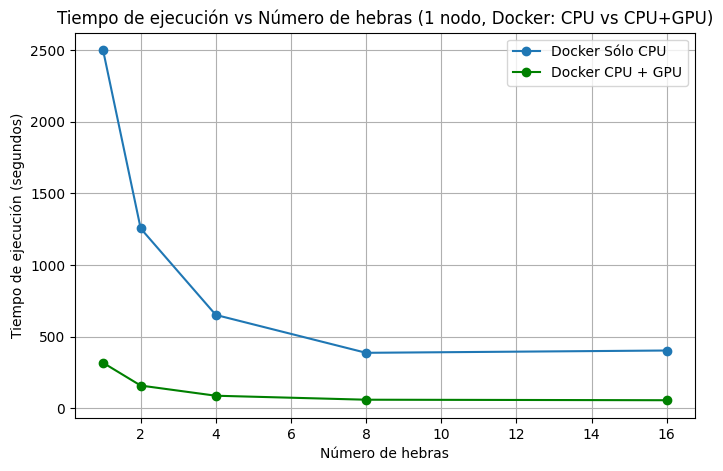

In [101]:
# Comparative plot in a single figure: Docker sólo CPU vs Docker CPU+GPU (1 nodo)
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_docker_single_node['threads'], df_ubuntu_docker_single_node['time_seconds'], marker='o', label='Docker Sólo CPU')
plt.plot(df_ubuntu_docker_gpu_single_node['threads'], df_ubuntu_docker_gpu_single_node['time_seconds'], marker='o', color='green', label='Docker CPU + GPU')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución vs Número de hebras (1 nodo, Docker: CPU vs CPU+GPU)')
plt.legend()
plt.grid(True)
plt.show()

In [116]:
# Get the base time (1 thread) for Docker GPU
base_time_docker_gpu = df_ubuntu_docker_gpu_single_node[df_ubuntu_docker_gpu_single_node['threads'] == 1]['time_seconds'].values[0]

# Calculate percentage variation
df_ubuntu_docker_gpu_single_node['Δ%'] = 100 * (df_ubuntu_docker_gpu_single_node['time_seconds'] - base_time_docker_gpu) / base_time_docker_gpu

# Create and display the table
table_docker_gpu = df_ubuntu_docker_gpu_single_node[['threads', 'time_seconds', 'Δ%']].rename(
    columns={'threads': 'Hebras', 'time_seconds': 'Tiempo (s)', 'Δ%': 'Δ% vs 1 hebra'}
)
display(Markdown(table_docker_gpu.to_markdown(index=False, floatfmt=".2f")))

|   Hebras |   Tiempo (s) |   Δ% vs 1 hebra |
|---------:|-------------:|----------------:|
|     1.00 |       318.34 |            0.00 |
|     2.00 |       159.61 |          -49.86 |
|     4.00 |        88.66 |          -72.15 |
|     8.00 |        60.84 |          -80.89 |
|    16.00 |        57.28 |          -82.01 |

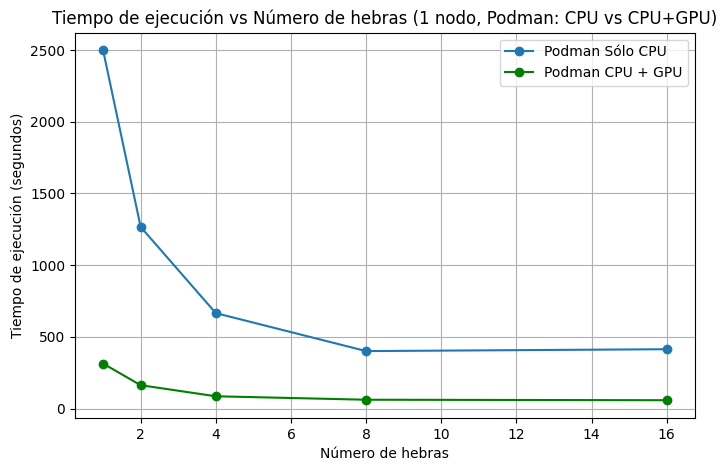

In [103]:
# Comparative plot in a single figure: Podman sólo CPU vs Podman CPU+GPU (1 nodo)
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_podman_single_node['threads'], df_ubuntu_podman_single_node['time_seconds'], marker='o', label='Podman Sólo CPU')
plt.plot(df_ubuntu_podman_gpu_single_node['threads'], df_ubuntu_podman_gpu_single_node['time_seconds'], marker='o', color='green', label='Podman CPU + GPU')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución vs Número de hebras (1 nodo, Podman: CPU vs CPU+GPU)')
plt.legend()
plt.grid(True)
plt.show()

In [117]:
# Get the base time (1 thread) for Podman GPU
base_time_podman_gpu = df_ubuntu_podman_gpu_single_node[df_ubuntu_podman_gpu_single_node['threads'] == 1]['time_seconds'].values[0]

# Calculate percentage variation
df_ubuntu_podman_gpu_single_node['Δ%'] = 100 * (df_ubuntu_podman_gpu_single_node['time_seconds'] - base_time_podman_gpu) / base_time_podman_gpu

# Create and display the table
table_podman_gpu = df_ubuntu_podman_gpu_single_node[['threads', 'time_seconds', 'Δ%']].rename(
    columns={'threads': 'Hebras', 'time_seconds': 'Tiempo (s)', 'Δ%': 'Δ% vs 1 hebra'}
)
display(Markdown(table_podman_gpu.to_markdown(index=False, floatfmt=".2f")))

|   Hebras |   Tiempo (s) |   Δ% vs 1 hebra |
|---------:|-------------:|----------------:|
|     1.00 |       313.59 |            0.00 |
|     2.00 |       162.63 |          -48.14 |
|     4.00 |        85.39 |          -72.77 |
|     8.00 |        61.21 |          -80.48 |
|    16.00 |        57.80 |          -81.57 |

## Ejecución en Contenedores en Windows


### Sólo CPU


### CPU + GPU


### Comparativa de Rendimiento


## Ejecución en Contenedores en Mac


### Sólo CPU


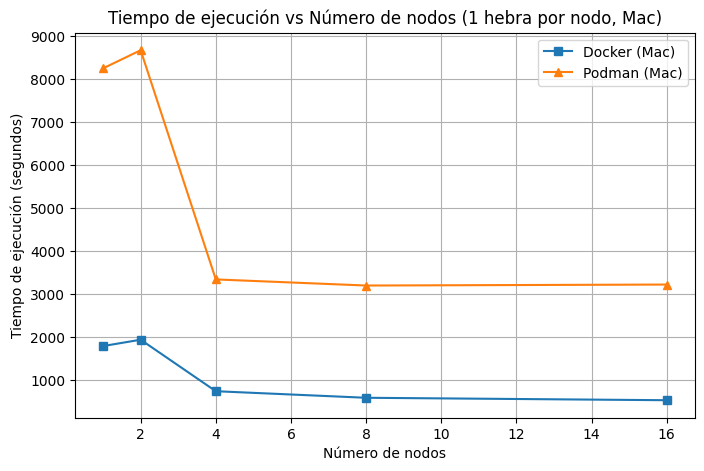

In [119]:
# Load data
df_mac_docker = pd.read_csv('../results/thread-sweep/mac_docker.csv')
df_mac_podman = pd.read_csv('../results/thread-sweep/mac_podman.csv')

# Filter only runs with 1 thread per node
df_mac_docker_single_node = df_mac_docker[df_mac_docker['threads'] == 1].copy()
df_mac_podman_single_node = df_mac_podman[df_mac_podman['threads'] == 1].copy()

# Convert time column to seconds
df_mac_docker_single_node['time_seconds'] = df_mac_docker_single_node['time'].apply(time_to_seconds)
df_mac_podman_single_node['time_seconds'] = df_mac_podman_single_node['time'].apply(time_to_seconds)

# Plot: Execution time vs number of nodes (1 thread per node)
plt.figure(figsize=(8, 5))
plt.plot(df_mac_docker_single_node['nodes'], df_mac_docker_single_node['time_seconds'], marker='s', label='Docker (Mac)')
plt.plot(df_mac_podman_single_node['nodes'], df_mac_podman_single_node['time_seconds'], marker='^', label='Podman (Mac)')
plt.xlabel('Número de nodos')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución vs Número de nodos (1 hebra por nodo, Mac)')
plt.legend()
plt.grid(True)
plt.show()

In [120]:
# Calculate percentage variation for Mac Docker vs Mac Podman
table_mac = pd.DataFrame({
    'Threads': df_mac_docker[df_mac_docker['nodes'] == 1]['threads'],
    'Docker (Mac) (s)': df_mac_docker[df_mac_docker['nodes'] == 1]['time'].apply(time_to_seconds).values,
    'Podman (Mac) (s)': df_mac_podman[df_mac_podman['nodes'] == 1]['time'].apply(time_to_seconds).values,
    'Podman Δ%': 100 * (
        df_mac_podman[df_mac_podman['nodes'] == 1]['time'].apply(time_to_seconds).values -
        df_mac_docker[df_mac_docker['nodes'] == 1]['time'].apply(time_to_seconds).values
    ) / df_mac_docker[df_mac_docker['nodes'] == 1]['time'].apply(time_to_seconds).values
})

display(Markdown(table_mac.to_markdown(index=False, floatfmt=".2f")))

|   Threads |   Docker (Mac) (s) |   Podman (Mac) (s) |   Podman Δ% |
|----------:|-------------------:|-------------------:|------------:|
|      1.00 |            1794.98 |            8247.00 |      359.45 |
|      2.00 |             951.56 |            4328.00 |      354.83 |
|      4.00 |             551.41 |            2250.20 |      308.08 |
|      8.00 |             304.35 |            1638.79 |      438.46 |
|     16.00 |             270.25 |            1625.19 |      501.37 |

# Escalabilidad Multinodo


## Ejecución Nativa


### Sólo CPU


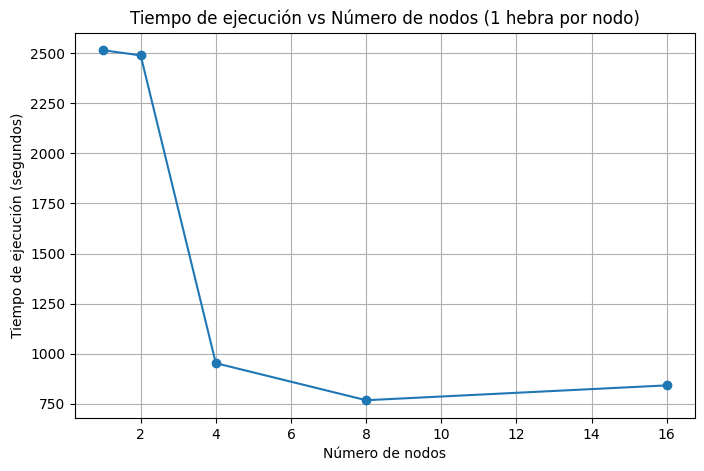

In [121]:
# Filter for runs with a single thread per node
df_ubuntu_native_single_thread = df_ubuntu_native[df_ubuntu_native['threads'] == 1].copy()

# Convert the 'time' column to seconds using the provided function
df_ubuntu_native_single_thread['time_seconds'] = df_ubuntu_native_single_thread['time'].apply(time_to_seconds)

# Plot execution time vs number of nodes for runs with 1 thread per node
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_single_thread['nodes'], df_ubuntu_native_single_thread['time_seconds'], marker='o')
plt.xlabel('Número de nodos')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución vs Número de nodos (1 hebra por nodo)')
plt.grid(True)
plt.show()

In [122]:
# Get the reference time for 1 node
ref_time = df_ubuntu_native_single_thread[df_ubuntu_native_single_thread['nodes'] == 1]['time_seconds'].values[0]

# Calculate percentage variation vs 1 node
df_ubuntu_native_single_thread['Δ% vs 1 node'] = 100 * (df_ubuntu_native_single_thread['time_seconds'] - ref_time) / ref_time

# Show the data as a markdown table
table = df_ubuntu_native_single_thread[['nodes', 'time_seconds', 'Δ% vs 1 node']].rename(
    columns={'nodes': 'Nodos', 'time_seconds': 'Tiempo de ejecución (s)', 'Δ% vs 1 node': 'Δ% vs 1 nodo'}
)
display(Markdown(table.to_markdown(index=False, floatfmt=".2f")))

|   Nodos |   Tiempo de ejecución (s) |   Δ% vs 1 nodo |
|--------:|--------------------------:|---------------:|
|    1.00 |                   2515.21 |           0.00 |
|    2.00 |                   2489.49 |          -1.02 |
|    4.00 |                    952.85 |         -62.12 |
|    8.00 |                    767.87 |         -69.47 |
|   16.00 |                    841.96 |         -66.53 |

**Análisis:**

- **Escalabilidad inicial muy limitada:** Al pasar de 1 a 2 nodos, el tiempo apenas mejora (-1.02%), lo que indica que el problema no se paraleliza eficientemente con solo 2 nodos.
- **Mejora significativa con 4 nodos:** Con 4 nodos, el tiempo de ejecución cae un 62%, mostrando que a partir de este punto la paralelización es efectiva.
- **Óptimo relativo en 8 nodos:** El mejor tiempo se obtiene con 8 nodos (-69.47%), lo que implica que la eficiencia de paralelización es máxima en este punto para este experimento.
- **Degradación al aumentar a 16 nodos:** Al usar 16 nodos, el tiempo aumenta respecto a 8 nodos y la mejora respecto a 1 nodo es menor (-66.53%). Esto sugiere que la sobrecarga de comunicación y sincronización empieza a superar los beneficios de añadir más nodos.

**Conclusión:**  
La escalabilidad es muy baja con pocos nodos, mejora mucho al llegar a 4 y 8 nodos, pero añadir más nodos no aporta mejoras adicionales e incluso puede empeorar el rendimiento por overhead. El punto óptimo para este caso concreto es 8 nodos.


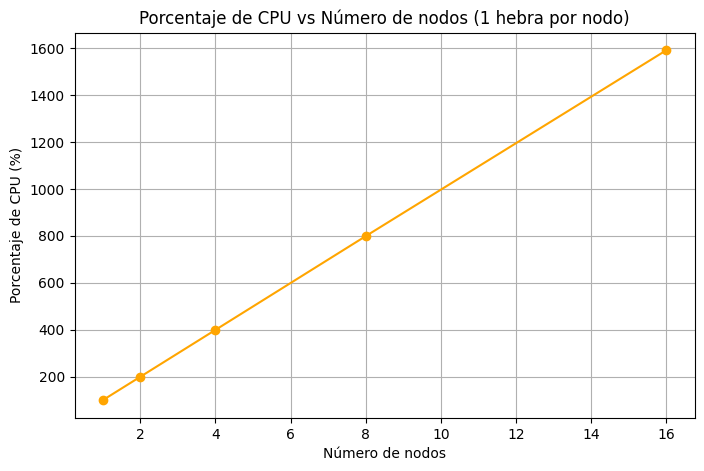

In [123]:
# Plot: CPU usage vs number of nodes (labels in Spanish)
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_single_thread['nodes'], df_ubuntu_native_single_thread['cpu_percentage'], marker='o', color='orange')
plt.xlabel('Número de nodos')
plt.ylabel('Porcentaje de CPU (%)')
plt.title('Porcentaje de CPU vs Número de nodos (1 hebra por nodo)')
plt.grid(True)
plt.show()

In [125]:
# Summary table: CPU usage vs number of nodes (labels in Spanish)
cpu_table = df_ubuntu_native_single_thread[['nodes', 'cpu_percentage']].rename(
    columns={'nodes': 'Nodos', 'cpu_percentage': 'Porcentaje de CPU (%)'}
)
# Add theoretical max CPU usage column (nodos x 100)
cpu_table['Max uso CPU (%)'] = cpu_table['Nodos'] * 100
# Add efficiency column: CPU usage (%) / Max CPU usage (%) * 100
cpu_table['Eficiencia CPU (%)'] = 100 * cpu_table['Porcentaje de CPU (%)'] / cpu_table['Max uso CPU (%)']
display(Markdown(cpu_table.to_markdown(index=False, floatfmt=".2f")))

|   Nodos |   Porcentaje de CPU (%) |   Max uso CPU (%) |   Eficiencia CPU (%) |
|--------:|------------------------:|------------------:|---------------------:|
|    1.00 |                   99.00 |            100.00 |                99.00 |
|    2.00 |                  199.00 |            200.00 |                99.50 |
|    4.00 |                  399.00 |            400.00 |                99.75 |
|    8.00 |                  799.00 |            800.00 |                99.88 |
|   16.00 |                 1592.00 |           1600.00 |                99.50 |

**Análisis**

- El uso de CPU aumenta de manera prácticamente lineal con el número de nodos, lo que evidencia un escalado eficiente en la utilización de recursos computacionales.
- La eficiencia de CPU se mantiene elevada en todos los escenarios (≥99%), indicando que el sistema aprovecha casi la totalidad de la capacidad de cómputo disponible, incluso al incrementar el número de nodos.
- El valor máximo de eficiencia se observa con 8 nodos (99.88%), aunque la diferencia respecto al resto de configuraciones es marginal.
- No se detecta una disminución significativa de la eficiencia al escalar hasta 16 nodos, lo que sugiere que la sobrecarga asociada a la gestión y comunicación entre nodos es mínima o está adecuadamente controlada en este entorno experimental.
- Estos resultados reflejan un comportamiento de escalabilidad sobresaliente en términos de uso de CPU, lo que es especialmente relevante para aplicaciones de computación paralela.

**Conclusiones**  
El sistema mantiene una eficiencia de CPU prácticamente óptima al aumentar el número de nodos, lo que confirma la idoneidad de la arquitectura y la implementación paralela para este caso de uso.


### CPU + GPU


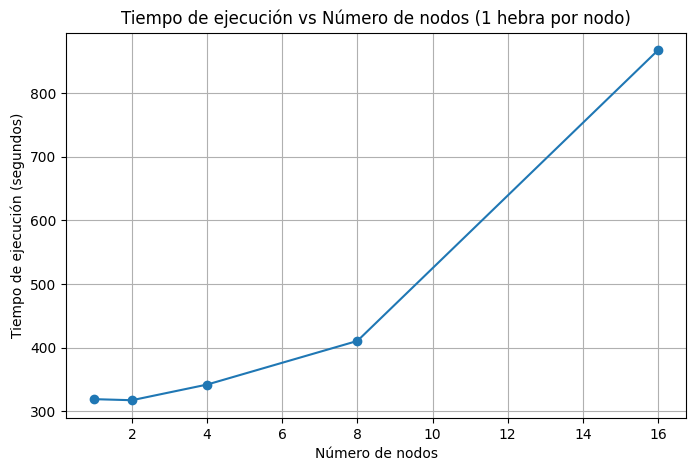

## Ejecución en Contenedores en Nativo


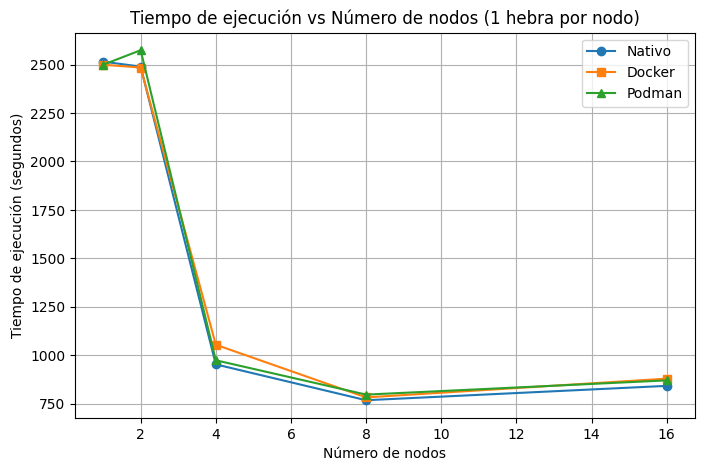

In [ ]:
# Scalability by number of nodes (1 thread per node): Native vs Docker vs Podman

# Load data
df_native = pd.read_csv('../results/thread-sweep/ubuntu_native.csv')
df_docker = pd.read_csv('../results/thread-sweep/ubuntu_docker.csv')
df_podman = pd.read_csv('../results/thread-sweep/ubuntu_podman.csv')

# Filter only runs with 1 thread per node
df_native_1t = df_native[df_native['threads'] == 1].copy()
df_docker_1t = df_docker[df_docker['threads'] == 1].copy()
df_podman_1t = df_podman[df_podman['threads'] == 1].copy()

# Convert time column to seconds
df_native_1t['time_seconds'] = df_native_1t['time'].apply(time_to_seconds)
df_docker_1t['time_seconds'] = df_docker_1t['time'].apply(time_to_seconds)
df_podman_1t['time_seconds'] = df_podman_1t['time'].apply(time_to_seconds)

# Plot: Execution time vs number of nodes (1 thread per node)
plt.figure(figsize=(8, 5))
plt.plot(df_native_1t['nodes'], df_native_1t['time_seconds'], marker='o', label='Nativo')
plt.plot(df_docker_1t['nodes'], df_docker_1t['time_seconds'], marker='s', label='Docker')
plt.plot(df_podman_1t['nodes'], df_podman_1t['time_seconds'], marker='^', label='Podman')
plt.xlabel('Número de nodos')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución vs Número de nodos (1 hebra por nodo)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Comparative table and percentage variation
table_nodes = pd.DataFrame({
    'Nodos': df_native_1t['nodes'],
    'Nativo (s)': df_native_1t['time_seconds'].values,
    'Docker (s)': df_docker_1t['time_seconds'].values,
    'Docker Δ%': 100 * (df_docker_1t['time_seconds'].values - df_native_1t['time_seconds'].values) / df_native_1t['time_seconds'].values,
    'Podman (s)': df_podman_1t['time_seconds'].values,
    'Podman Δ%': 100 * (df_podman_1t['time_seconds'].values - df_native_1t['time_seconds'].values) / df_native_1t['time_seconds'].values,
})
display(Markdown(table_nodes.to_markdown(index=False, floatfmt=".2f")))

|   Nodos |   Nativo (s) |   Docker (s) |   Docker Δ% |   Podman (s) |   Podman Δ% |
|--------:|-------------:|-------------:|------------:|-------------:|------------:|
|    1.00 |      2515.21 |      2499.09 |       -0.64 |      2499.16 |       -0.64 |
|    2.00 |      2489.49 |      2484.80 |       -0.19 |      2574.04 |        3.40 |
|    4.00 |       952.85 |      1054.20 |       10.64 |       973.92 |        2.21 |
|    8.00 |       767.87 |       782.42 |        1.89 |       796.84 |        3.77 |
|   16.00 |       841.96 |       879.20 |        4.42 |       870.28 |        3.36 |

**Análisis**

- **1 y 2 nodos:** Docker y Podman presentan tiempos de ejecución prácticamente idénticos o incluso ligeramente mejores que el entorno nativo (Δ% negativo).
- **A partir de 4 nodos:** Docker muestra un incremento notable en el tiempo de ejecución respecto al nativo (hasta un **10.64%** más lento con 4 nodos), mientras que Podman también es más lento, pero con una penalización menor (máximo **3.77%**).
- **8 y 16 nodos:** Docker y Podman siguen siendo algo más lentos que el nativo, pero la diferencia se reduce respecto al caso de 4 nodos.

**Comportamiento de Docker**

- Docker es el entorno que más penalización muestra al aumentar el número de nodos, especialmente en la transición de 2 a 4 nodos.
- Para 1 y 2 nodos, Docker incluso mejora levemente el tiempo respecto al nativo, lo que puede deberse a variabilidad experimental o a una mejor gestión puntual de recursos.

**Comportamiento de Podman**

- Podman mantiene una penalización moderada y más estable que Docker a partir de 4 nodos.
- En ningún caso supera el **4%** de penalización respecto al nativo.

**Tendencia general**

- El mayor impacto negativo de los contenedores se observa al escalar a 4 nodos, especialmente en Docker.
- Para configuraciones de muchos nodos (8 y 16), la penalización de Docker y Podman es similar y relativamente baja (entre **1.9%** y **4.4%**).

**Conclusión**

El uso de contenedores Docker y Podman no afecta significativamente al rendimiento para configuraciones de 1 y 2 nodos, e incluso puede mejorar levemente el tiempo de ejecución. Sin embargo, al aumentar el número de nodos, especialmente a 4, Docker muestra una penalización considerable, mientras que Podman mantiene una penalización más baja y estable. Para 8 y 16 nodos, ambos entornos presentan una penalización moderada respecto al nativo, pero siempre inferior al **5%**. Por tanto, el uso de contenedores es viable para la mayoría de los escenarios, aunque se debe tener en cuenta la penalización al escalar a múltiples nodos, especialmente con Docker.


## Ejecución en Contenedores en Mac


## Ejecución en Contenedores en Windows


# Barrido de Hebras


## Ejecución Nativa


### Tiempo de Ejecución


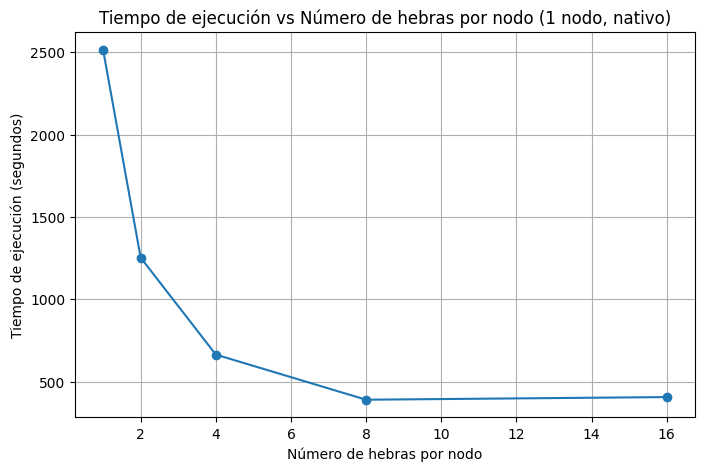

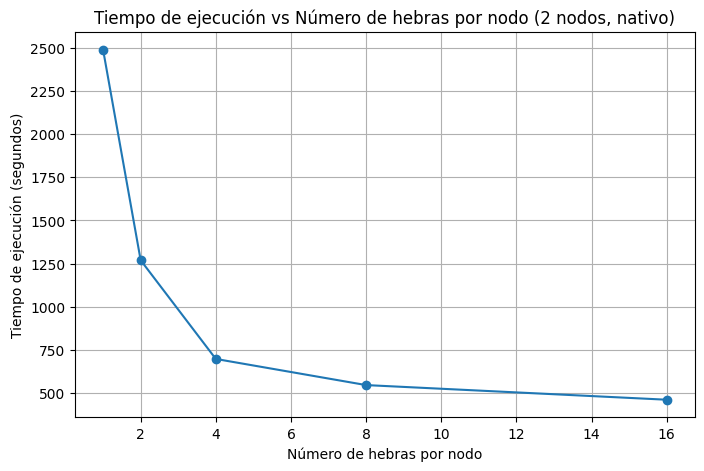

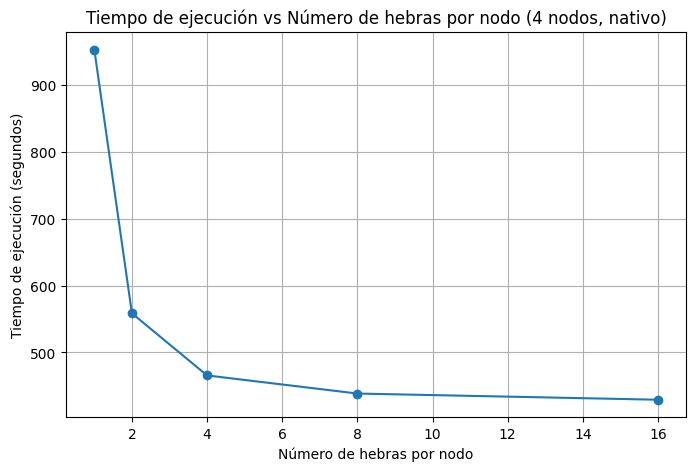

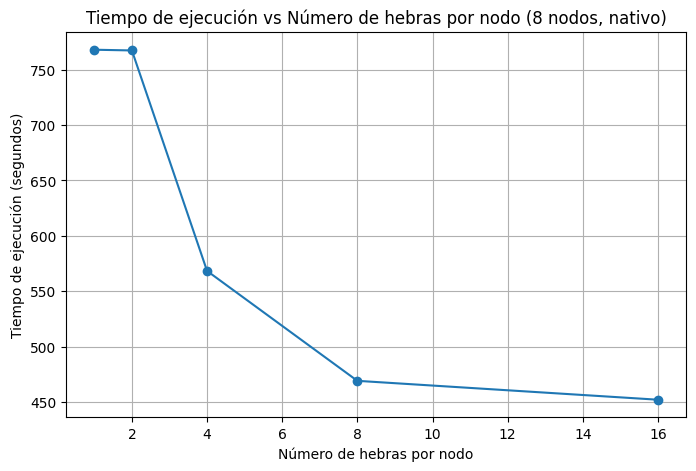

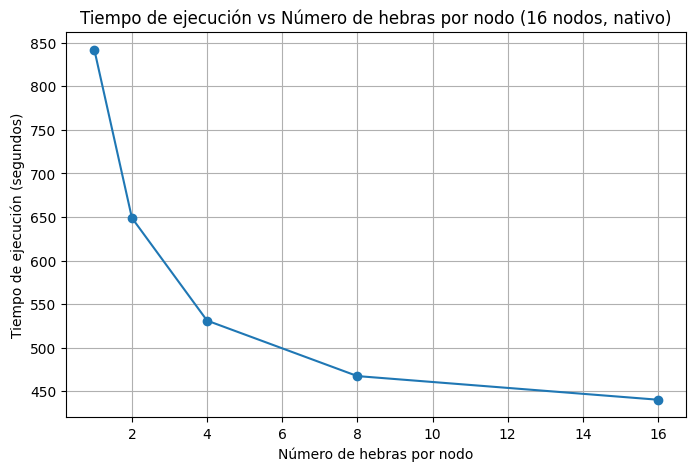

In [ ]:

df = pd.read_csv('../results/thread-sweep/ubuntu_native.csv')
df['time_seconds'] = df['time'].apply(time_to_seconds)

# Generate plots for each node count
for n_nodos in [1, 2, 4, 8, 16]:
    df_n = df[df['nodes'] == n_nodos]
    if df_n.empty:
        continue
    plt.figure(figsize=(8, 5))
    plt.plot(df_n['threads'], df_n['time_seconds'], marker='o')
    plt.xlabel('Número de hebras por nodo')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title(f'Tiempo de ejecución vs Número de hebras por nodo ({n_nodos} nodo{"s" if n_nodos > 1 else ""}, nativo)')
    plt.grid(True)
    plt.show()

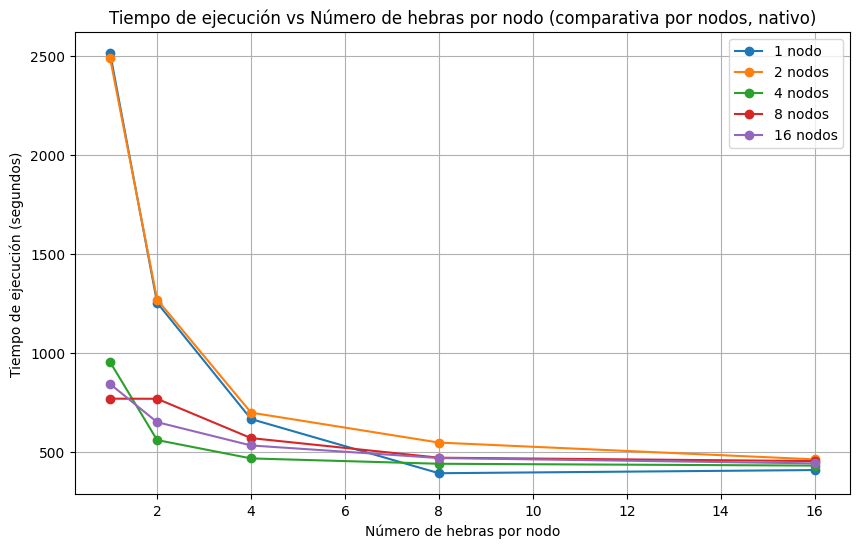

In [ ]:
df = pd.read_csv('../results/thread-sweep/ubuntu_native.csv')
df['time_seconds'] = df['time'].apply(time_to_seconds)

plt.figure(figsize=(10, 6))
for n_nodos in [1, 2, 4, 8, 16]:
    df_n = df[df['nodes'] == n_nodos]
    if df_n.empty:
        continue
    plt.plot(df_n['threads'], df_n['time_seconds'], marker='o', label=f'{n_nodos} nodo{"s" if n_nodos > 1 else ""}')
plt.xlabel('Número de hebras por nodo')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución vs Número de hebras por nodo (comparativa por nodos, nativo)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df = pd.read_csv('../results/thread-sweep/ubuntu_native.csv')
df['time_seconds'] = df['time'].apply(time_to_seconds)

for n_nodes in [1, 2, 4, 8, 16]:
    df_n = df[df['nodes'] == n_nodes].copy()
    if df_n.empty:
        continue
    # Get reference time with 1 thread
    ref = df_n[df_n['threads'] == 1]['time_seconds']
    if ref.empty:
        continue
    ref_time = ref.values[0]
    df_n['Δ% vs 1 thread'] = 100 * (df_n['time_seconds'] - ref_time) / ref_time
    table = df_n[['threads', 'time_seconds', 'Δ% vs 1 thread']].rename(
        columns={'threads': 'Hebras', 'time_seconds': 'Tiempo de ejecución (s)', 'Δ% vs 1 thread': 'Δ% vs 1 hebra'}
    ).sort_values('Hebras')
    display(Markdown(f"### {n_nodes} nodo{'s' if n_nodes > 1 else ''}"))
    display(Markdown(table.to_markdown(index=False, floatfmt=".2f")))

### 1 nodo

|   Hebras |   Tiempo de ejecución (s) |   Δ% vs 1 hebra |
|---------:|--------------------------:|----------------:|
|     1.00 |                   2515.21 |            0.00 |
|     2.00 |                   1253.18 |          -50.18 |
|     4.00 |                    664.69 |          -73.57 |
|     8.00 |                    390.72 |          -84.47 |
|    16.00 |                    406.76 |          -83.83 |

### 2 nodos

|   Hebras |   Tiempo de ejecución (s) |   Δ% vs 1 hebra |
|---------:|--------------------------:|----------------:|
|     1.00 |                   2489.49 |            0.00 |
|     2.00 |                   1269.36 |          -49.01 |
|     4.00 |                    697.22 |          -71.99 |
|     8.00 |                    545.73 |          -78.08 |
|    16.00 |                    460.89 |          -81.49 |

### 4 nodos

|   Hebras |   Tiempo de ejecución (s) |   Δ% vs 1 hebra |
|---------:|--------------------------:|----------------:|
|     1.00 |                    952.85 |            0.00 |
|     2.00 |                    558.59 |          -41.38 |
|     4.00 |                    465.64 |          -51.13 |
|     8.00 |                    438.55 |          -53.97 |
|    16.00 |                    429.30 |          -54.95 |

### 8 nodos

|   Hebras |   Tiempo de ejecución (s) |   Δ% vs 1 hebra |
|---------:|--------------------------:|----------------:|
|     1.00 |                    767.87 |            0.00 |
|     2.00 |                    767.21 |           -0.09 |
|     4.00 |                    568.34 |          -25.98 |
|     8.00 |                    469.23 |          -38.89 |
|    16.00 |                    452.19 |          -41.11 |

### 16 nodos

|   Hebras |   Tiempo de ejecución (s) |   Δ% vs 1 hebra |
|---------:|--------------------------:|----------------:|
|     1.00 |                    841.96 |            0.00 |
|     2.00 |                    649.02 |          -22.92 |
|     4.00 |                    531.22 |          -36.91 |
|     8.00 |                    467.56 |          -44.47 |
|    16.00 |                    440.44 |          -47.69 |

**Análisis**

- **1 nodo:** El escalado es casi ideal hasta 8 hebras, con una reducción del tiempo de ejecución del 84.5% respecto a 1 hebra, lo que evidencia un aprovechamiento óptimo del paralelismo. A partir de 8 hebras, no se observan mejoras adicionales; con 16 hebras el tiempo incluso empeora ligeramente, indicando saturación o sobrecarga de gestión de hilos.

- **2 nodos:** Se mantiene una tendencia similar al caso mononodo, con una reducción del 81.5% al emplear 16 hebras frente a 1 hebra. Sin embargo, el beneficio incremental al aumentar el número de hebras es menor a partir de 8, mostrando rendimientos decrecientes.

- **4 nodos:** El escalado es más limitado; la reducción máxima alcanza el 55% con 16 hebras. El salto de rendimiento al pasar de 1 a 2 hebras es menor que en los casos anteriores, y el incremento de hebras aporta mejoras cada vez menos significativas.

- **8 nodos:** La escalabilidad es muy baja hasta 2 hebras (reducción prácticamente nula, -0.09%). A partir de 4 hebras, el beneficio es mayor, pero la reducción máxima solo llega al 41% con 16 hebras.

- **16 nodos:** El escalado es limitado, con una reducción máxima del 47.7% al utilizar 16 hebras. Las mejoras son graduales y nunca tan pronunciadas como en el caso mononodo.

**Conclusiones técnicas:**

- El mejor escalado se obtiene en la configuración mononodo, donde el paralelismo a nivel de hebras se aprovecha de forma casi óptima hasta 8 hebras.
- A medida que aumenta el número de nodos, la eficiencia del paralelismo disminuye y la reducción porcentual respecto a 1 hebra es cada vez menor.
- En configuraciones multinodo, la sobrecarga de comunicación y sincronización limita el beneficio de añadir más hebras, especialmente en 8 y 16 nodos.
- El punto óptimo de escalabilidad se alcanza con 1 nodo y 8 hebras; a partir de ahí, el rendimiento apenas mejora o incluso empeora.
- Para cargas distribuidas, es fundamental analizar si el problema realmente se beneficia de la distribución multinodo o si es preferible maximizar el uso de hebras en un solo nodo.

**Resumen:**  
El paralelismo a nivel de hebras es altamente eficiente en un solo nodo, pero la escalabilidad se degrada al repartir las hebras entre varios nodos debido a la sobrecarga de coordinación. El mayor beneficio se obtiene en el caso mononodo hasta 8 hebras; en multinodo, la mejora es considerablemente más limitada.


### Uso de CPU


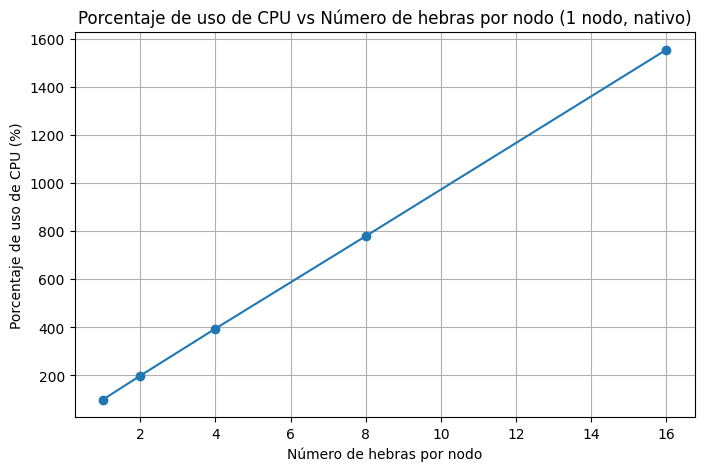

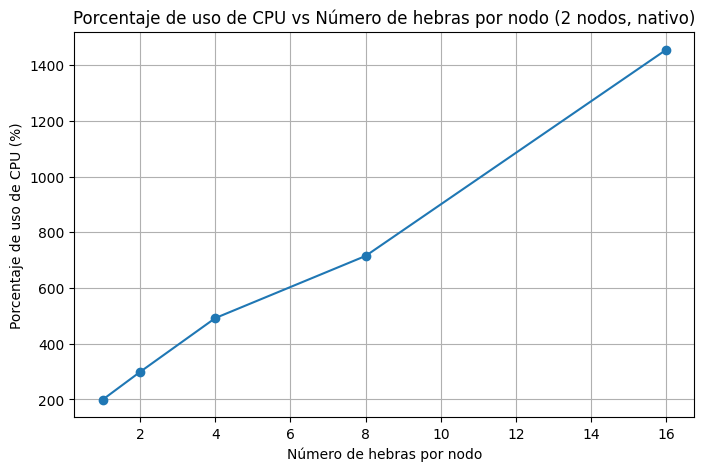

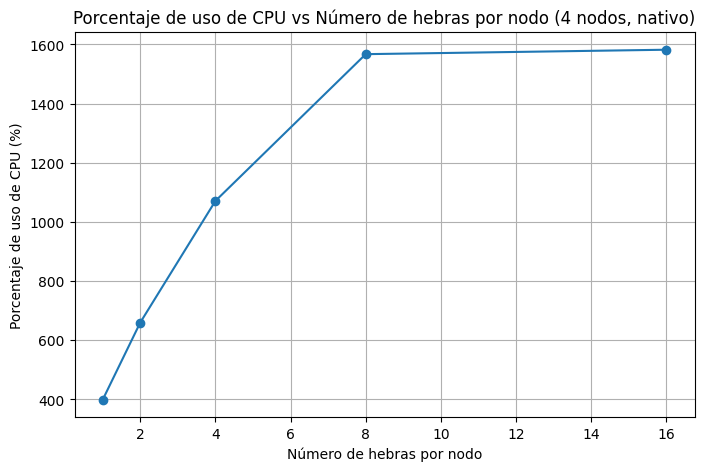

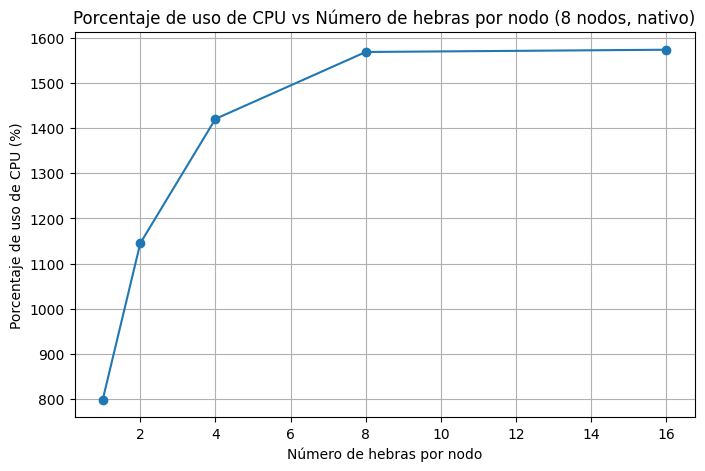

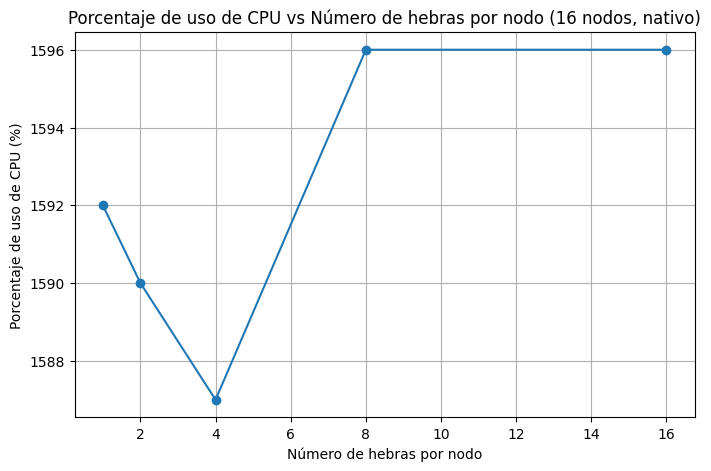

In [ ]:
df = pd.read_csv('../results/thread-sweep/ubuntu_native.csv')

# Plot CPU usage vs number of threads per node for each number of nodes
for n_nodos in [1, 2, 4, 8, 16]:
    df_n = df[df['nodes'] == n_nodos]
    if df_n.empty:
        continue
    plt.figure(figsize=(8, 5))
    plt.plot(df_n['threads'], df_n['cpu_percentage'], marker='o')
    plt.xlabel('Número de hebras por nodo')
    plt.ylabel('Porcentaje de uso de CPU (%)')
    plt.title(f'Porcentaje de uso de CPU vs Número de hebras por nodo ({n_nodos} nodo{"s" if n_nodos > 1 else ""}, nativo)')
    plt.grid(True)
    plt.show()

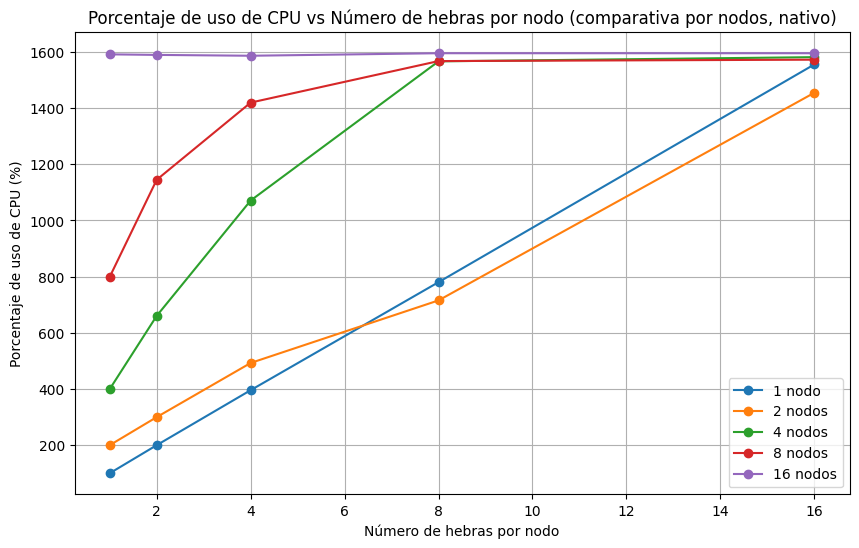

In [ ]:
df = pd.read_csv('../results/thread-sweep/ubuntu_native.csv')

plt.figure(figsize=(10, 6))
for n_nodos in [1, 2, 4, 8, 16]:
    df_n = df[df['nodes'] == n_nodos]
    if df_n.empty:
        continue
    plt.plot(df_n['threads'], df_n['cpu_percentage'], marker='o', label=f'{n_nodos} nodo{"s" if n_nodos > 1 else ""}')
plt.xlabel('Número de hebras por nodo')
plt.ylabel('Porcentaje de uso de CPU (%)')
plt.title('Porcentaje de uso de CPU vs Número de hebras por nodo (comparativa por nodos, nativo)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df = pd.read_csv('../results/thread-sweep/ubuntu_native.csv')

for n_nodes in [1, 2, 4, 8, 16]:
    df_n = df[df['nodes'] == n_nodes].copy()
    if df_n.empty:
        continue
    # Referencia: uso de CPU con 1 hebra
    ref = df_n[df_n['threads'] == 1]['cpu_percentage']
    if ref.empty:
        continue
    ref_cpu = ref.values[0]
    df_n['Δ% vs 1 hebra'] = 100 * (df_n['cpu_percentage'] - ref_cpu) / ref_cpu
    table = df_n[['threads', 'cpu_percentage', 'Δ% vs 1 hebra']].rename(
        columns={'threads': 'Hebras', 'cpu_percentage': 'Porcentaje de CPU (%)'}
    ).sort_values('Hebras')
    display(Markdown(f"### {n_nodes} nodo{'s' if n_nodes > 1 else ''}"))
    display(Markdown(table.to_markdown(index=False, floatfmt=".2f")))

### 1 nodo

|   Hebras |   Porcentaje de CPU (%) |   Δ% vs 1 hebra |
|---------:|------------------------:|----------------:|
|     1.00 |                   99.00 |            0.00 |
|     2.00 |                  199.00 |          101.01 |
|     4.00 |                  395.00 |          298.99 |
|     8.00 |                  780.00 |          687.88 |
|    16.00 |                 1556.00 |         1471.72 |

### 2 nodos

|   Hebras |   Porcentaje de CPU (%) |   Δ% vs 1 hebra |
|---------:|------------------------:|----------------:|
|     1.00 |                  199.00 |            0.00 |
|     2.00 |                  299.00 |           50.25 |
|     4.00 |                  492.00 |          147.24 |
|     8.00 |                  715.00 |          259.30 |
|    16.00 |                 1455.00 |          631.16 |

### 4 nodos

|   Hebras |   Porcentaje de CPU (%) |   Δ% vs 1 hebra |
|---------:|------------------------:|----------------:|
|     1.00 |                  399.00 |            0.00 |
|     2.00 |                  660.00 |           65.41 |
|     4.00 |                 1071.00 |          168.42 |
|     8.00 |                 1567.00 |          292.73 |
|    16.00 |                 1582.00 |          296.49 |

### 8 nodos

|   Hebras |   Porcentaje de CPU (%) |   Δ% vs 1 hebra |
|---------:|------------------------:|----------------:|
|     1.00 |                  799.00 |            0.00 |
|     2.00 |                 1145.00 |           43.30 |
|     4.00 |                 1420.00 |           77.72 |
|     8.00 |                 1568.00 |           96.25 |
|    16.00 |                 1573.00 |           96.87 |

### 16 nodos

|   Hebras |   Porcentaje de CPU (%) |   Δ% vs 1 hebra |
|---------:|------------------------:|----------------:|
|     1.00 |                 1592.00 |            0.00 |
|     2.00 |                 1590.00 |           -0.13 |
|     4.00 |                 1587.00 |           -0.31 |
|     8.00 |                 1596.00 |            0.25 |
|    16.00 |                 1596.00 |            0.25 |

## Ejecución en Contenedores en Nativo


## Ejecución en Contenedores en Mac


## Ejecución en Contenedores en Windows


# Escalado en Hebras vs en Nodos


## Nativo: Tiempo de Ejecución vs Número de Nodos


## Nativo: Porcentaje de uso de CPU vs Número de nodos


## Nativo vs Docker


# Escalabilidad Mononodo vs Multinodo


## Docker


In [ ]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Filter to only show rows where nodes == 1
df_nodes_1_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == 1]

# Convert time columns to seconds
df_nodes_1_docker['time_seconds'] = df_nodes_1_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_1_docker['threads'], df_nodes_1_docker['time_seconds'], marker='o', label='Docker (1 nodo)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (1 nodo)')
plt.legend()
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../results/scalability_multi-node_sweep-threads_docker.csv'

/tmp/ipykernel_48519/3099732139.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_2_docker['time_seconds'] = df_nodes_2_docker['time'].apply(time_to_seconds)


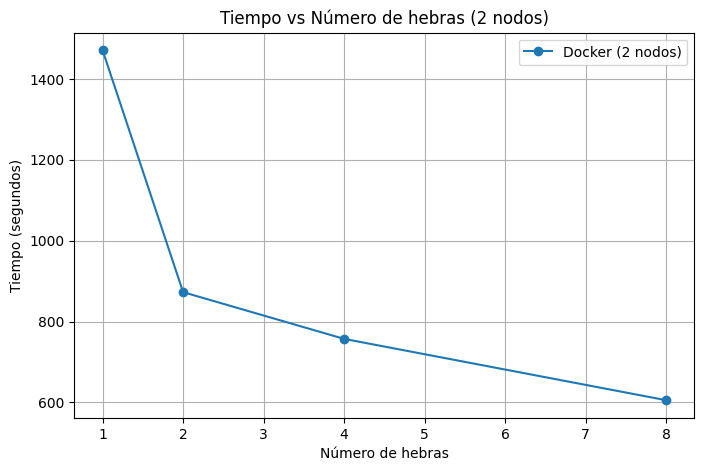

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Filter to only show rows where nodes == 2
df_nodes_2_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == 2]

# Convert time columns to seconds
df_nodes_2_docker['time_seconds'] = df_nodes_2_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_2_docker['threads'], df_nodes_2_docker['time_seconds'], marker='o', label='Docker (2 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (2 nodos)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_48519/1548939894.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_4_docker['time_seconds'] = df_nodes_4_docker['time'].apply(time_to_seconds)


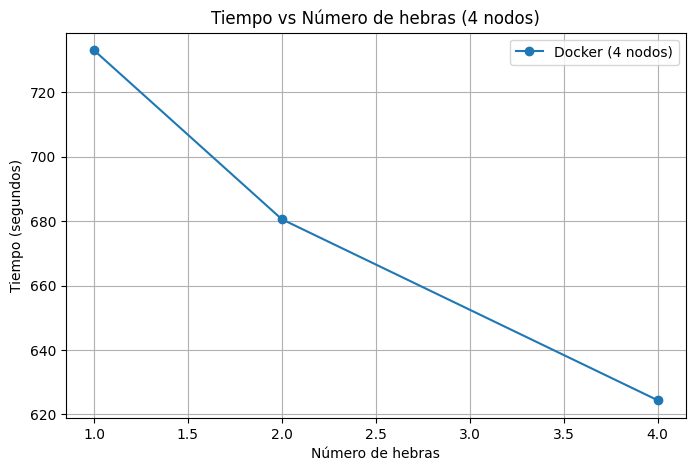

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Filter to only show rows where nodes == 4
df_nodes_4_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == 4]

# Convert time columns to seconds
df_nodes_4_docker['time_seconds'] = df_nodes_4_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_4_docker['threads'], df_nodes_4_docker['time_seconds'], marker='o', label='Docker (4 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (4 nodos)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_48519/2037687382.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_8_docker['time_seconds'] = df_nodes_8_docker['time'].apply(time_to_seconds)


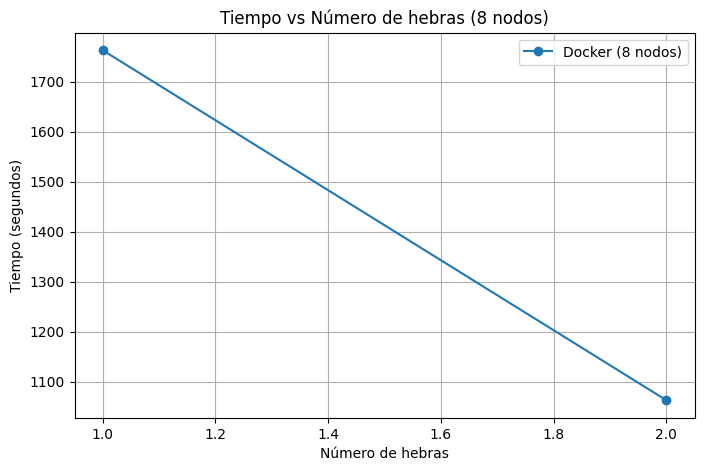

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Filter to only show rows where nodes == 8
df_nodes_8_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == 8]

# Convert time columns to seconds
df_nodes_8_docker['time_seconds'] = df_nodes_8_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_8_docker['threads'], df_nodes_8_docker['time_seconds'], marker='o', label='Docker (8 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (8 nodos)')
plt.legend()
plt.grid(True)
plt.show()

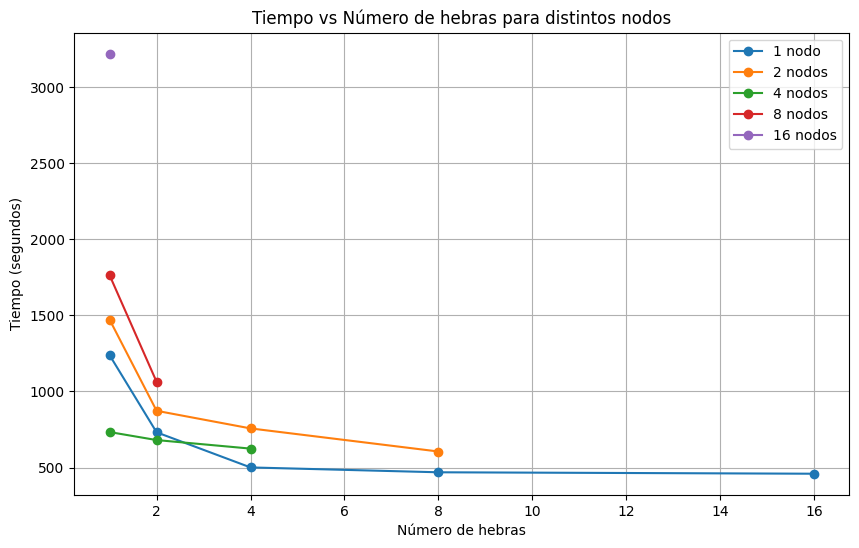

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Convert time columns to seconds
df_multi_node_sweep_threads_docker['time_seconds'] = df_multi_node_sweep_threads_docker['time'].apply(time_to_seconds)

# Plotting: compare all nodes (1, 2, 4, 8, 16)
plt.figure(figsize=(10, 6))
for n in [1, 2, 4, 8, 16]:
    df_n = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == n]
    plt.plot(df_n['threads'], df_n['time_seconds'], marker='o', label=f'{n} nodo{"s" if n > 1 else ""}')

plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras para distintos nodos')
plt.legend()
plt.grid(True)
plt.show()

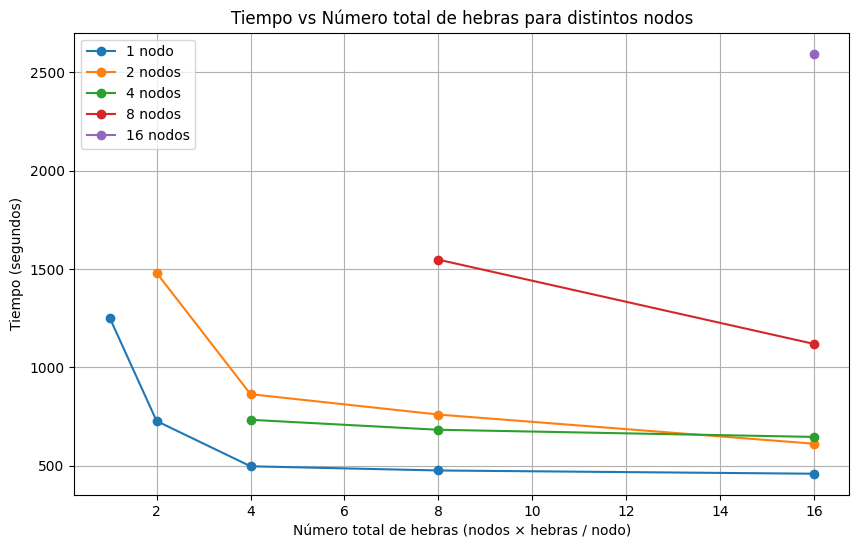

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Crear columna con el número total de hebras (nodos * hebras)
df_multi_node_sweep_threads_docker['total_threads'] = df_multi_node_sweep_threads_docker['nodes'] * df_multi_node_sweep_threads_docker['threads']

# Convertir columna de tiempo a segundos
df_multi_node_sweep_threads_docker['time_seconds'] = df_multi_node_sweep_threads_docker['time'].apply(time_to_seconds)

# Graficar: Tiempo vs Número total de hebras, agrupando por nodos
plt.figure(figsize=(10, 6))
for n in [1, 2, 4, 8, 16]:
    df_n = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == n]
    plt.plot(df_n['total_threads'], df_n['time_seconds'], marker='o', label=f'{n} nodo{"s" if n > 1 else ""}')

plt.xlabel('Número total de hebras (nodos × hebras / nodo)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número total de hebras para distintos nodos')
plt.legend()
plt.grid(True)
plt.show()

## Nativo vs Docker


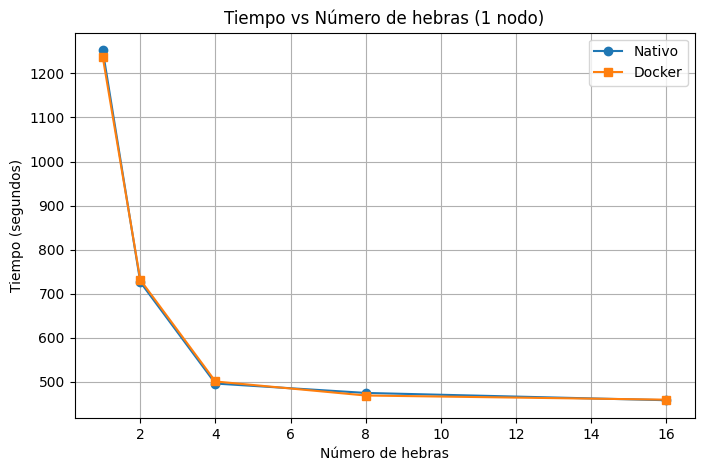

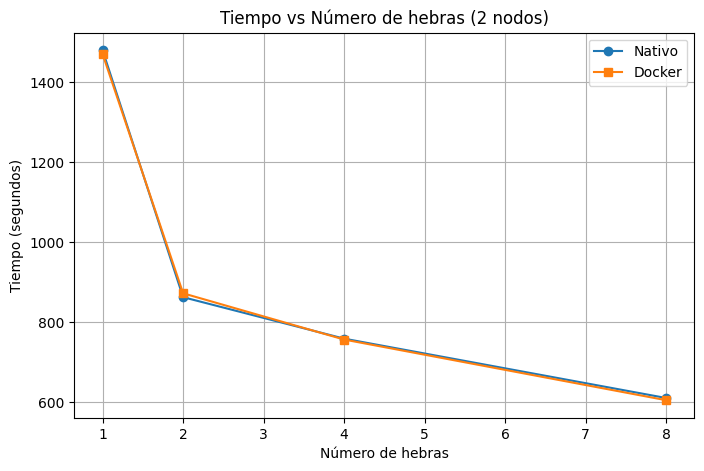

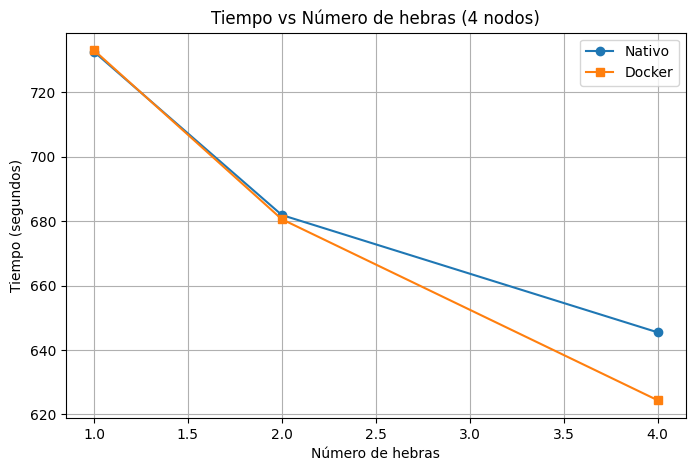

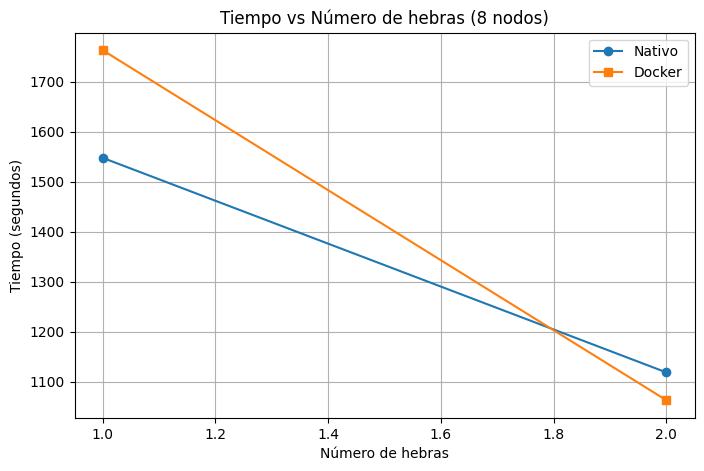

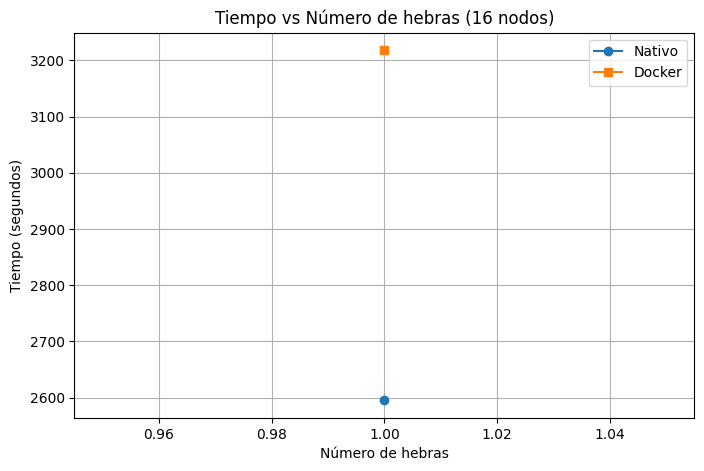

In [ ]:
# Comparación multinodo barrido de hebras: Nativo vs Docker

# Cargar datos
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Convertir columna de tiempo a segundos
df_multi_node_sweep_threads_native['time_seconds'] = df_multi_node_sweep_threads_native['time'].apply(time_to_seconds)
df_multi_node_sweep_threads_docker['time_seconds'] = df_multi_node_sweep_threads_docker['time'].apply(time_to_seconds)

# Graficar comparación para cada número de nodos
for n in [1, 2, 4, 8, 16]:
    df_n_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == n]
    df_n_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == n]

    plt.figure(figsize=(8, 5))
    plt.plot(df_n_native['threads'], df_n_native['time_seconds'], marker='o', label='Nativo')
    plt.plot(df_n_docker['threads'], df_n_docker['time_seconds'], marker='s', label='Docker')
    plt.xlabel('Número de hebras')
    plt.ylabel('Tiempo (segundos)')
    plt.title(f'Tiempo vs Número de hebras ({n} nodo{"s" if n > 1 else ""})')
    plt.legend()
    plt.grid(True)
    plt.show()

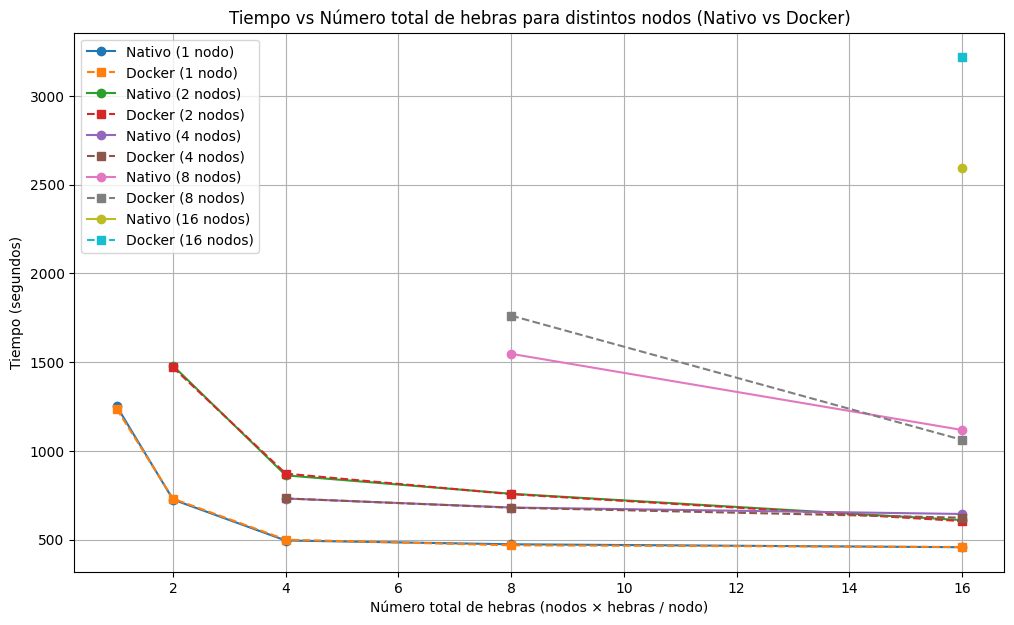

In [ ]:
# Comparación multinodo barrido de hebras: Nativo vs Docker (todas las gráficas juntas, eje x = número total de hebras)

# Cargar datos
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Crear columna con el número total de hebras (nodos * hebras)
df_multi_node_sweep_threads_native['total_threads'] = df_multi_node_sweep_threads_native['nodes'] * df_multi_node_sweep_threads_native['threads']
df_multi_node_sweep_threads_docker['total_threads'] = df_multi_node_sweep_threads_docker['nodes'] * df_multi_node_sweep_threads_docker['threads']

# Convertir columna de tiempo a segundos
df_multi_node_sweep_threads_native['time_seconds'] = df_multi_node_sweep_threads_native['time'].apply(time_to_seconds)
df_multi_node_sweep_threads_docker['time_seconds'] = df_multi_node_sweep_threads_docker['time'].apply(time_to_seconds)

# Graficar: Tiempo vs Número total de hebras, agrupando por nodos y comparando nativo vs docker
plt.figure(figsize=(12, 7))
for n in [1, 2, 4, 8, 16]:
    df_n_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == n]
    df_n_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == n]
    plt.plot(df_n_native['total_threads'], df_n_native['time_seconds'], marker='o', label=f'Nativo ({n} nodo{"s" if n > 1 else ""})')
    plt.plot(df_n_docker['total_threads'], df_n_docker['time_seconds'], marker='s', linestyle='--', label=f'Docker ({n} nodo{"s" if n > 1 else ""})')

plt.xlabel('Número total de hebras (nodos × hebras / nodo)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número total de hebras para distintos nodos (Nativo vs Docker)')
plt.legend()
plt.grid(True)
plt.show()